# 公开数据集

![公开数据集描述](./public/dataset.png)
- granularity 粒度 grain size

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


- 将两个csv文件的指定部分截取，凭借成一个csv

In [2]:
import pandas as pd

# 读取第一个CSV文件
df1 = pd.read_csv('long.csv')


# 读取第二个CSV文件
df2 = pd.read_csv('long2_1.csv')

# 选择第一个CSV文件的第500行到第4400行（索引从0开始，所以是499到4399）
subset1 = df1.iloc[4194:54271, :]

# 选择第二个CSV文件的第300行到第3600行（索引从0开始，所以是299到3599）
subset2 = df2.iloc[5424:55149, :]

# 拼接两个子集
combined = pd.concat([subset1, subset2], ignore_index=True)

# 保存为新的CSV文件
combined.to_csv('combined_long.csv', index=False)
# 检查每个数据集的形状
print(f'df1 shape: {df1.shape}')
print(f'subset1 shape: {subset1.shape}')
print(f'df2 shape: {df2.shape}')
print(f'subset2 shape: {subset2.shape}')
# 检查拼接后的数据集形状
print(f'combined shape: {combined.shape}')

print("New CSV file 'combined.csv' saved successfully.")


df1 shape: (57626, 248)
subset1 shape: (50077, 248)
df2 shape: (57609, 248)
subset2 shape: (49725, 248)
combined shape: (99802, 248)
New CSV file 'combined.csv' saved successfully.


- 处理时间戳

In [9]:
data=pd.read_csv('combined_long.csv')

# 删除原来的date列
if 'date' in combined.columns:
    combined = combined.drop(columns=['date'])

# 生成新的date列，从1秒开始，每个数据间隔10秒
num_rows = combined.shape[0]
new_dates = pd.date_range(start='2020-02-05 00:00:01', periods=num_rows, freq='10S')

# 将新的date列插入到DataFrame的第一列
combined.insert(0, 'date', new_dates)


data = data.drop(['ProblemTime'], axis=1)
# 将日期列设置为索引, 或者在to_csv设置index=False就不会多处一列序列号
data.set_index('date',inplace=True)

# 填补缺失值
data = data.fillna(axis=0, method='bfill') # axis=0 按列填充，axis=1 按行填充.。moteod='ffill'前向填充（赋值为前一个值，'bfill'后向填充

data.head()

# 将DataFrame保存为新的CSV文件
combined.to_csv('combined_long.csv', index=False)

print("New CSV file 'combined_long.csv' saved successfully.")

C:\Users\lins\AppData\Local\Temp\ipykernel_23576\3189790424.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(axis=0, method='bfill') # axis=0 按列填充，axis=1 按行填充.。moteod='ffill'前向填充（赋值为前一个值，'bfill'后向填充


New CSV file 'combined_long.csv' saved successfully.


In [21]:
data=pd.read_csv('fw80_pow90_loop1.csv') 


In [16]:
data.head(5)

,date,ProblemTime,vol_170101010.tempf,vol_170101020.tempf,vol_170101030.tempf,vol_170101040.tempf,vol_170101050.tempf,vol_170101060.tempf,vol_170102010.tempf,vol_170102020.tempf,...,R51_Profile(27),R51_Profile(28),R51_Profile(29),R51_Profile(30),R51_Profile(31),R51_Profile(32),R51_Profile(33),R51_Profile(34),R51_Profile(35),R51_Profile(36)
0,2020-02-05 00:00:01,340768.50,567.54913,574.38916,581.7100,588.15110,593.01220,594.70550,567.79510,574.8384,...,0.026965,0.030138,0.031537,0.031506,0.030524,0.028907,0.025565,0.021184,0.012783,0.006483
1,2020-02-05 00:00:11,340778.75,567.55100,574.39260,581.7150,588.15735,593.01940,594.71295,567.79710,574.8419,...,0.026971,0.030145,0.031544,0.031513,0.030531,0.028914,0.025571,0.021189,0.012786,0.006485
2,2020-02-05 00:00:21,340789.12,567.55310,574.39624,581.7204,588.16394,593.02704,594.72076,567.79926,574.8457,...,0.026978,0.030152,0.031552,0.031521,0.030539,0.028921,0.025577,0.021194,0.012789,0.006486
3,2020-02-05 00:00:31,340799.38,567.55524,574.40000,581.7259,588.17070,593.03485,594.72880,567.80145,574.8496,...,0.026985,0.030160,0.031559,0.031529,0.030546,0.028928,0.025583,0.021199,0.012792,0.006488
4,2020-02-05 00:00:41,340809.62,567.55743,574.40393,581.7315,588.17770,593.04285,594.73706,567.80370,574.8536,...,0.026991,0.030167,0.031567,0.031537,0.030554,0.028936,0.025590,0.021205,0.012795,0.006489


In [22]:
data.describe()

,date,vol_170101010.tempf,vol_170101020.tempf,vol_170101030.tempf,vol_170101040.tempf,vol_170101050.tempf,vol_170101060.tempf,vol_170102010.tempf,vol_170102020.tempf,vol_170102030.tempf,...,R51_Profile(27),R51_Profile(28),R51_Profile(29),R51_Profile(30),R51_Profile(31),R51_Profile(32),R51_Profile(33),R51_Profile(34),R51_Profile(35),R51_Profile(36)
count,8175.000000,8175.000000,8175.000000,8175.000000,8175.000000,8175.000000,8175.000000,8175.000000,8175.000000,8175.000000,...,8175.000000,8175.000000,8175.000000,8175.000000,8175.000000,8175.000000,8175.000000,8175.000000,8175.000000,8175.000000
mean,4196.395183,594.780101,600.094602,605.364823,609.584866,612.367599,613.311415,595.015929,600.466364,605.843852,...,0.026546,0.029669,0.031046,0.031016,0.030049,0.028458,0.025167,0.020854,0.012584,0.006382
std,2423.896628,16.820131,14.935255,12.701836,10.565617,8.799321,8.217994,16.723766,14.769974,12.452412,...,0.001238,0.001384,0.001448,0.001447,0.001402,0.001327,0.001174,0.000973,0.000587,0.000298
min,0.000000,568.757140,576.646900,585.003200,591.152100,595.622860,597.165040,568.913940,577.045170,585.642940,...,0.023369,0.026119,0.027331,0.027305,0.026454,0.025053,0.022156,0.018359,0.011078,0.005619
25%,2097.437500,580.873200,587.306850,594.125700,600.029235,604.446565,605.955250,581.205050,587.847850,594.831420,...,0.026067,0.029134,0.030486,0.030457,0.029508,0.027945,0.024713,0.020478,0.012357,0.006267
50%,4196.125000,592.646900,598.912600,605.403700,610.918100,614.907400,616.225000,592.956240,599.387800,606.040400,...,0.026252,0.029340,0.030702,0.030672,0.029717,0.028143,0.024888,0.020624,0.012445,0.006311
75%,6294.875000,605.883300,611.693300,616.610200,618.807735,619.484670,619.620620,606.070465,612.040680,616.791100,...,0.026525,0.029647,0.031022,0.030992,0.030027,0.028436,0.025148,0.020839,0.012575,0.006377
max,8394.250000,632.441600,632.497100,632.531070,632.452450,632.450560,637.419000,632.437500,632.497300,632.562800,...,0.031239,0.034915,0.036536,0.036500,0.035363,0.033490,0.029617,0.024542,0.014809,0.007511


- **设置为index的列，head出来就是低一点，如下面。**

In [18]:
# data.rename(columns={'TrendTime':'date'},inplace=True)
data = data.drop([ 'ProblemTime'], axis=1)
# 将日期列设置为索引, 或者在to_csv设置index=False就不会多处一列序列号
# data.set_index('date',inplace=True)

data.head()

,date,vol_170101010.tempf,vol_170101020.tempf,vol_170101030.tempf,vol_170101040.tempf,vol_170101050.tempf,vol_170101060.tempf,vol_170102010.tempf,vol_170102020.tempf,vol_170102030.tempf,...,R51_Profile(27),R51_Profile(28),R51_Profile(29),R51_Profile(30),R51_Profile(31),R51_Profile(32),R51_Profile(33),R51_Profile(34),R51_Profile(35),R51_Profile(36)
0,2020-02-05 00:00:01,567.54913,574.38916,581.7100,588.15110,593.01220,594.70550,567.79510,574.8384,582.37770,...,0.026965,0.030138,0.031537,0.031506,0.030524,0.028907,0.025565,0.021184,0.012783,0.006483
1,2020-02-05 00:00:11,567.55100,574.39260,581.7150,588.15735,593.01940,594.71295,567.79710,574.8419,582.38293,...,0.026971,0.030145,0.031544,0.031513,0.030531,0.028914,0.025571,0.021189,0.012786,0.006485
2,2020-02-05 00:00:21,567.55310,574.39624,581.7204,588.16394,593.02704,594.72076,567.79926,574.8457,582.38840,...,0.026978,0.030152,0.031552,0.031521,0.030539,0.028921,0.025577,0.021194,0.012789,0.006486
3,2020-02-05 00:00:31,567.55524,574.40000,581.7259,588.17070,593.03485,594.72880,567.80145,574.8496,582.39404,...,0.026985,0.030160,0.031559,0.031529,0.030546,0.028928,0.025583,0.021199,0.012792,0.006488
4,2020-02-05 00:00:41,567.55743,574.40393,581.7315,588.17770,593.04285,594.73706,567.80370,574.8536,582.39990,...,0.026991,0.030167,0.031567,0.031537,0.030554,0.028936,0.025590,0.021205,0.012795,0.006489


In [36]:
# 删除前26行
data = data.iloc[26:] 
# 填补缺失值
data = data.fillna(axis=0, method='bfill') # axis=0 按列填充，axis=1 按行填充.。moteod='ffill'前向填充（赋值为前一个值，'bfill'后向填充
data.head()
data.to_csv('myLong.csv')

C:\Users\lins\AppData\Local\Temp\ipykernel_28572\2742757054.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(axis=0, method='bfill') # axis=0 按列填充，axis=1 按行填充.。moteod='ffill'前向填充（赋值为前一个值，'bfill'后向填充


- 降采样

In [20]:
import numpy as np
# data = pd.read_csv("./myLong.csv")
# 假设原始数据有 57000 行，我们希望每 10 行取一个平均值，变成 5700 行
# 使用 numpy 的 reshape 和 pandas 的 groupby 进行重采样

# 假设原始数据有 57000 行，我们希望每 10 行取一个平均值，变成 5700 行
# date 列单独处理，不计算均值

# Step 1: 提取 date 列
date_col = data['date']

# Step 2: 对剩余列进行均值计算
data_values = data.drop(columns=['date']) # date列不参与取均值
data_grouped = data_values.groupby(np.arange(len(data_values)) // 10).mean()

# Step 3: 处理 date 列，只保留每组的第一个 date
date_grouped = date_col.groupby(np.arange(len(date_col)) // 10).first().reset_index(drop=True)

# Step 4: 合并 date 列和重采样后的数据
data_grouped.insert(0, 'date', date_grouped)

# Step 5: 保存重采样后的数据到新的 CSV 文件（可选）
data_grouped.to_csv('myLong_resampled_file_2.csv', index=False)

In [5]:
# plt.figure(figsize=(15, 7))
plt.figure(figsize=(10, 6))
plt.plot(Traffic_df['date'], Traffic_df['0'], label='000')
plt.xlabel('Datetime')
plt.ylabel('000 Value')
plt.title('Value Trend Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

# 我的数据

- **设置为index的列，head出来就是低一点，如下面。**

In [3]:
# 处理时间格式为datatime
data = pd.read_csv('POWER0.3-1_LOOP.csv')
data.rename(columns={'TrendTime':'date'},inplace=True)
# data.head()
data['date'] = pd.to_datetime('2023-11-03') + pd.to_timedelta(data['date'], unit='s')
data = data.drop([ 'ProblemTime'], axis=1)
# 将日期列设置为索引, 或者在to_csv设置index=False就不会多处一列序列号
data.set_index('date',inplace=True)
data.to_csv('myPOWER0.3-1_LOOP.csv')
data.head()

,vol_170101010.tempf,vol_170101020.tempf,vol_170101030.tempf,vol_170101040.tempf,vol_170101050.tempf,vol_170101060.tempf,vol_170102010.tempf,vol_170102020.tempf,vol_170102030.tempf,vol_170102040.tempf,...,vol_800020000.tempg,vol_800030000.tempg,vol_800040000.tempg,vol_800050000.tempg,vol_800060000.tempg,vol_800070000.tempg,vol_800080000.tempg,vol_800090000.tempg,vol_800100000.tempg,vol_800110000.tempg
date,,,,,,,,,,,,,,,,,,,,,
2023-11-03 00:00:00.000,561.7451,564.425,567.3406,569.9825,572.05023,572.7693,561.8418,564.6052,567.60730,570.3382,...,557.21820,557.13230,557.05110,556.97340,556.89700,556.82214,556.7482,556.66754,556.6090,556.55414
2023-11-03 00:00:00.625,561.7451,564.425,567.3406,569.9825,572.05023,572.7693,561.8418,564.6052,567.60730,570.3382,...,557.21814,557.13226,557.05110,556.97340,556.89700,556.82214,556.7482,556.66754,556.6090,556.55420
2023-11-03 00:00:01.625,561.7451,564.425,567.3406,569.9825,572.05023,572.7693,561.8418,564.6052,567.60730,570.3382,...,557.21820,557.13230,557.05110,556.97340,556.89703,556.82214,556.7482,556.66754,556.6090,556.55414
2023-11-03 00:00:02.625,561.7451,564.425,567.3406,569.9825,572.05023,572.7693,561.8418,564.6052,567.60730,570.3382,...,557.21820,557.13230,557.05115,556.97345,556.89703,556.82220,556.7482,556.66760,556.6091,556.55414
2023-11-03 00:00:03.750,561.7451,564.425,567.3406,569.9825,572.05023,572.7693,561.8418,564.6052,567.60736,570.3382,...,557.21826,557.13240,557.05120,556.97345,556.89710,556.82220,556.7482,556.66754,556.6089,556.55390


In [ ]:
data.describe()

,vol_170101010.tempf,vol_170101020.tempf,vol_170101030.tempf,vol_170101040.tempf,vol_170101050.tempf,vol_170101060.tempf,vol_170102010.tempf,vol_170102020.tempf,vol_170102030.tempf,vol_170102040.tempf,...,vol_800020000.tempg,vol_800030000.tempg,vol_800040000.tempg,vol_800050000.tempg,vol_800060000.tempg,vol_800070000.tempg,vol_800080000.tempg,vol_800090000.tempg,vol_800100000.tempg,vol_800110000.tempg
count,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000,...,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000
mean,568.825377,576.590247,584.815113,591.969617,597.304320,599.132121,569.107923,577.097253,585.552484,592.910339,...,557.234088,557.156941,557.082982,557.008618,556.930162,556.848327,556.760446,556.657819,556.614000,556.574067
std,2.089236,3.575756,5.102744,6.374961,7.281967,7.585727,2.143685,3.670036,5.235540,6.538960,...,0.009264,0.012145,0.014411,0.015486,0.015074,0.013366,0.009062,0.002368,0.004862,0.008062
min,561.745100,564.425000,567.340500,569.982400,572.050230,572.769300,561.841800,564.605200,567.607300,570.338200,...,557.212200,557.128400,557.049000,556.972100,556.895400,556.818850,556.740840,556.652160,556.603450,556.553900
25%,568.585545,576.203625,584.292660,591.382325,596.689050,598.515945,568.861475,576.707037,585.020765,592.307433,...,557.231930,557.154100,557.079600,557.004700,556.925585,556.842500,556.755500,556.656900,556.610645,556.570560
50%,569.861580,578.363495,587.343445,595.115325,600.886650,602.860280,570.171180,578.915625,588.143095,596.132275,...,557.238550,557.163050,557.090400,557.016660,556.938075,556.855400,556.765440,556.658500,556.616600,556.578370
75%,570.084547,578.735325,587.864550,595.754550,601.602950,603.598697,570.400025,579.298063,588.677325,596.791250,...,557.240800,557.165700,557.093400,557.019900,556.941350,556.858640,556.767500,556.658800,556.617900,556.580000
max,570.123960,578.800230,587.954700,595.865400,601.727000,603.726200,570.440400,579.364750,588.770100,596.905460,...,557.241150,557.166140,557.093900,557.020400,556.941900,556.859130,556.767760,556.668150,556.618160,556.580300


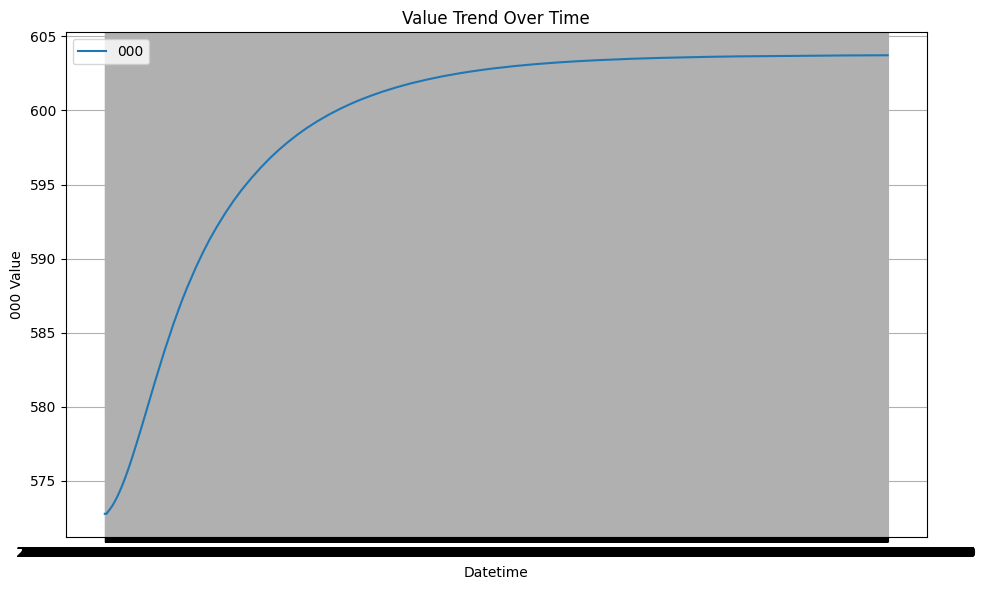

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('myPOWER0.3-1_LOOP.csv')
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['vol_170101060.tempf'], label='000')
plt.xlabel('Datetime')
plt.ylabel('000 Value')
plt.title('Value Trend Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

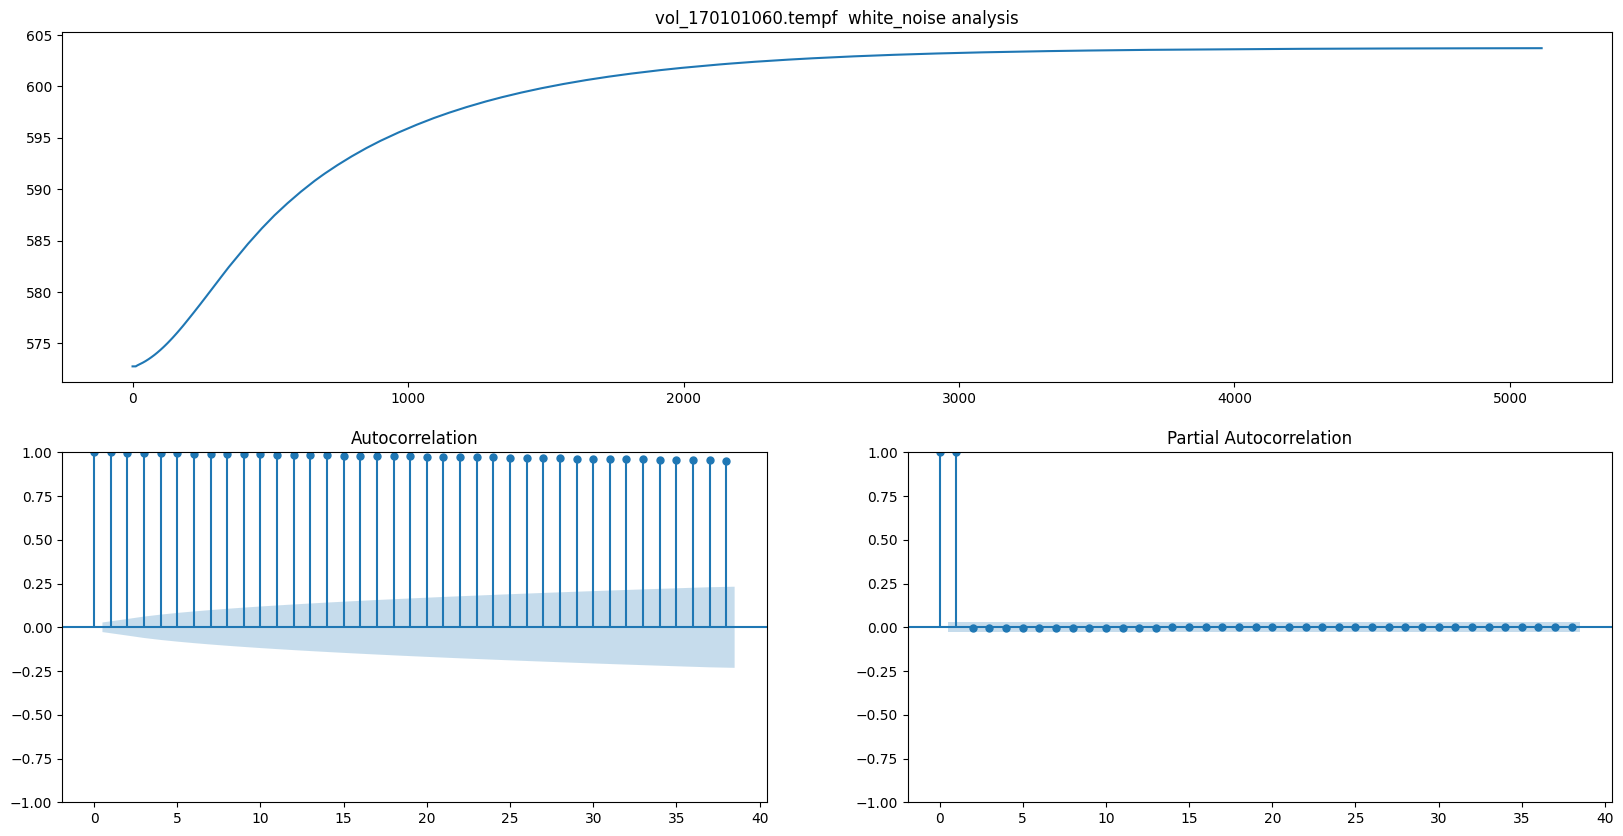

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

white_noise = data['vol_170101060.tempf']

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

ax1.plot(white_noise)
ax1.set_title('vol_170101060.tempf  white_noise analysis')
plot_acf(white_noise, ax=ax2)
plot_pacf(white_noise, ax=ax3)
plt.show()

### 由上图自相关性分析可知，序列不是白噪声，是有规律的

In [ ]:
features = data.drop(columns=['date'])
features

,vol_170101010.tempf,vol_170101020.tempf,vol_170101030.tempf,vol_170101040.tempf,vol_170101050.tempf,vol_170101060.tempf,vol_170102010.tempf,vol_170102020.tempf,vol_170102030.tempf,vol_170102040.tempf,...,vol_800020000.tempg,vol_800030000.tempg,vol_800040000.tempg,vol_800050000.tempg,vol_800060000.tempg,vol_800070000.tempg,vol_800080000.tempg,vol_800090000.tempg,vol_800100000.tempg,vol_800110000.tempg
0,561.74510,564.42500,567.34060,569.98250,572.05023,572.76930,561.84180,564.60520,567.60730,570.33820,...,557.21820,557.13230,557.05110,556.97340,556.89700,556.82214,556.74820,556.66754,556.60900,556.55414
1,561.74510,564.42500,567.34060,569.98250,572.05023,572.76930,561.84180,564.60520,567.60730,570.33820,...,557.21814,557.13226,557.05110,556.97340,556.89700,556.82214,556.74820,556.66754,556.60900,556.55420
2,561.74510,564.42500,567.34060,569.98250,572.05023,572.76930,561.84180,564.60520,567.60730,570.33820,...,557.21820,557.13230,557.05110,556.97340,556.89703,556.82214,556.74820,556.66754,556.60900,556.55414
3,561.74510,564.42500,567.34060,569.98250,572.05023,572.76930,561.84180,564.60520,567.60730,570.33820,...,557.21820,557.13230,557.05115,556.97345,556.89703,556.82220,556.74820,556.66760,556.60910,556.55414
4,561.74510,564.42500,567.34060,569.98250,572.05023,572.76930,561.84180,564.60520,567.60736,570.33820,...,557.21826,557.13240,557.05120,556.97345,556.89710,556.82220,556.74820,556.66754,556.60890,556.55390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5111,570.12390,578.80020,587.95460,595.86530,601.72687,603.72610,570.44037,579.36470,588.77000,596.90533,...,557.24115,557.16614,557.09390,557.02040,556.94190,556.85913,556.76776,556.65894,556.61816,556.58030
5112,570.12390,578.80020,587.95465,595.86530,601.72690,603.72614,570.44037,579.36475,588.77000,596.90533,...,557.24115,557.16614,557.09390,557.02040,556.94190,556.85913,556.76776,556.65894,556.61816,556.58030
5113,570.12390,578.80023,587.95465,595.86536,601.72690,603.72614,570.44040,579.36475,588.77010,596.90540,...,557.24115,557.16614,557.09390,557.02040,556.94190,556.85913,556.76776,556.65894,556.61816,556.58030
5114,570.12390,578.80023,587.95465,595.86536,601.72700,603.72620,570.44040,579.36475,588.77010,596.90540,...,557.24115,557.16614,557.09390,557.02040,556.94190,556.85913,556.76776,556.65894,556.61816,556.58030


- 直接计算相关性，得到的最重要的特征
  - 但当非线性关系时，相关性不能完全表示关系，需要结合散点图或者散点图矩阵

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# datetime不转换/去掉会报错。要加这两个
# Converting date to datetime and setting it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Dropping any non-numeric columns if present
data_numeric = data.select_dtypes(include=[np.number])


# 被预测变量以外的特征
features = data_numeric.drop(columns=['vol_170101060.tempf'])
# 预测变量
target = data_numeric['vol_170101060.tempf']  # 需要替换为实际目标变量
selector = SelectKBest(score_func=f_regression, k=20)
selector.fit(features, target)
selected_features = features.columns[selector.get_support()]

# Display the selected features
selected_features.tolist()

# data_numeric.describe()


['vol_170101040.tempf',
 'vol_170101050.tempf',
 'vol_170102040.tempf',
 'vol_170102050.tempf',
 'vol_170102060.tempf',
 'vol_170103040.tempf',
 'vol_170103050.tempf',
 'vol_170103060.tempf',
 'vol_340010000.tempf',
 'vol_340020000.tempf',
 'vol_340140000.tempf',
 'vol_440010000.tempf',
 'vol_440020000.tempf',
 'vol_440030000.tempf',
 'vol_440140000.tempf',
 'vol_440150000.tempf',
 'vol_540010000.tempf',
 'vol_540020000.tempf',
 'vol_540140000.tempf',
 'vol_540150000.tempf']

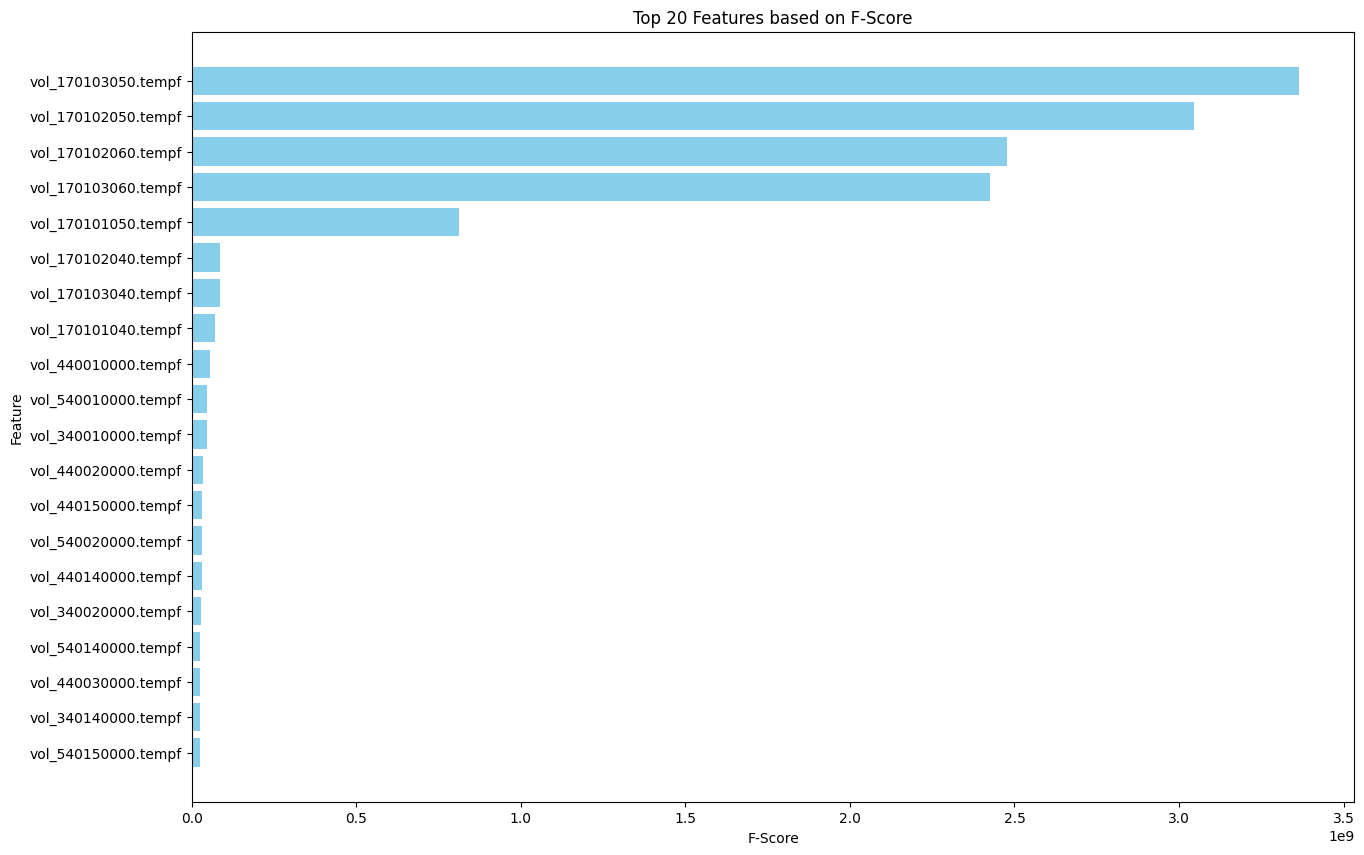

In [ ]:
import matplotlib.pyplot as plt

# Calculating F-scores for all features
f_scores = selector.scores_

# Creating a DataFrame for visualization
features_scores = pd.DataFrame({
    'Feature': features.columns,
    'F-Score': f_scores
})

# Sorting the DataFrame based on F-Score
features_scores_sorted = features_scores.sort_values(by='F-Score', ascending=False)

# Plotting
plt.figure(figsize=(15, 10))
plt.barh(features_scores_sorted['Feature'][:20], features_scores_sorted['F-Score'][:20], color='skyblue')
plt.xlabel('F-Score')  
plt.ylabel('Feature')
plt.title('Top 20 Features based on F-Score')
plt.gca().invert_yaxis()  # To display the highest score at the top
plt.show()


- 降采样成40个点，绘制散点图矩阵

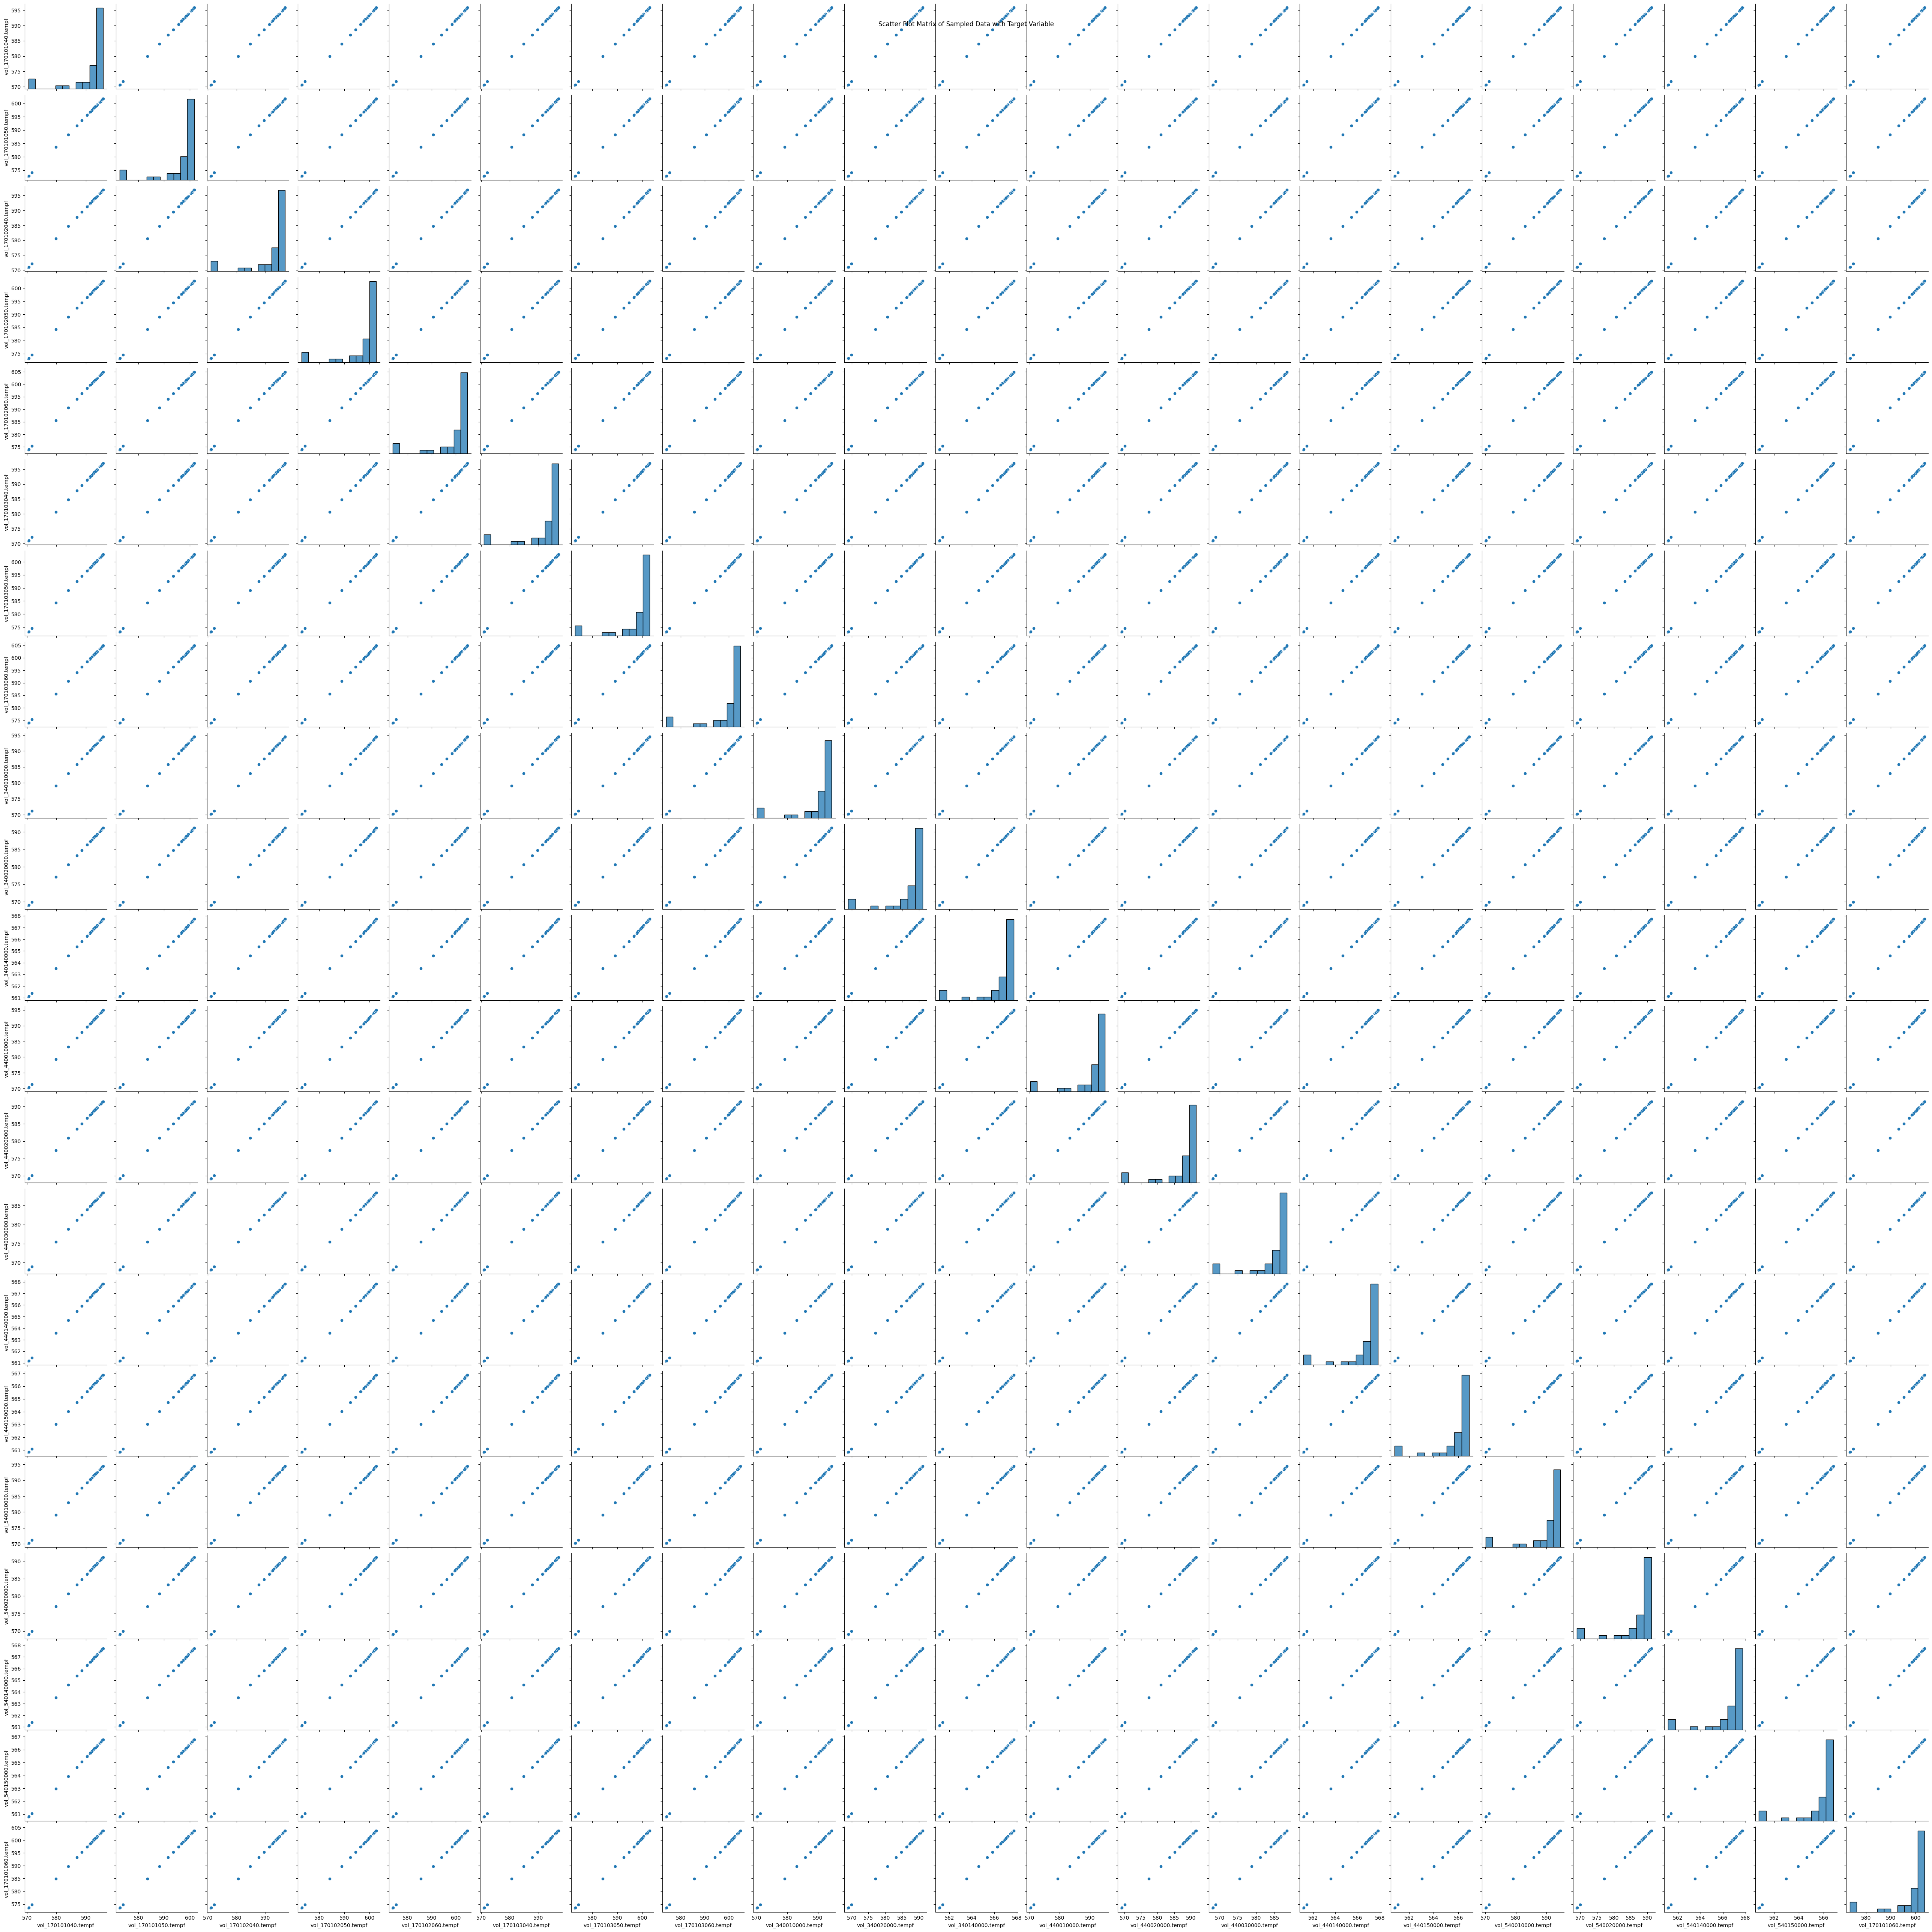

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('myPOWER0.3-1_LOOP.csv')

# 选取所需特征和目标变量
selected_features = ['vol_170101040.tempf',
 'vol_170101050.tempf',
 'vol_170102040.tempf',
 'vol_170102050.tempf',
 'vol_170102060.tempf',
 'vol_170103040.tempf',
 'vol_170103050.tempf',
 'vol_170103060.tempf',
 'vol_340010000.tempf',
 'vol_340020000.tempf',
 'vol_340140000.tempf',
 'vol_440010000.tempf',
 'vol_440020000.tempf',
 'vol_440030000.tempf',
 'vol_440140000.tempf',
 'vol_440150000.tempf',
 'vol_540010000.tempf',
 'vol_540020000.tempf',
 'vol_540140000.tempf',
 'vol_540150000.tempf',
 'vol_170101060.tempf']  # 示例特征名称
selected_data = data[selected_features]

# 降采样，每个特征降采样到40个点
sampled_data = selected_data.sample(n=40)

# 绘制散点图矩阵
sns.pairplot(sampled_data)
plt.suptitle("Scatter Plot Matrix of Sampled Data with Target Variable")
plt.show()


#### 移动平均，窗口5-->简单认为过去的平均值就是未来，一般作为baseline
- **还有个作用： 对数据进行平滑处理，以找到数据的变化趋势**
- 移动平均法是一种简单的时间序列预测技术。它通过计算过去一定数量的数据点的平均值来预测未来值。
  - 例如，如果您选择一个5天的窗口，那么每个预测值将是前5天值的平均。这种方法假设过去的趋势会在短期内持续。

MAE: 12.882746383369206, MSE: 171.12931688589117


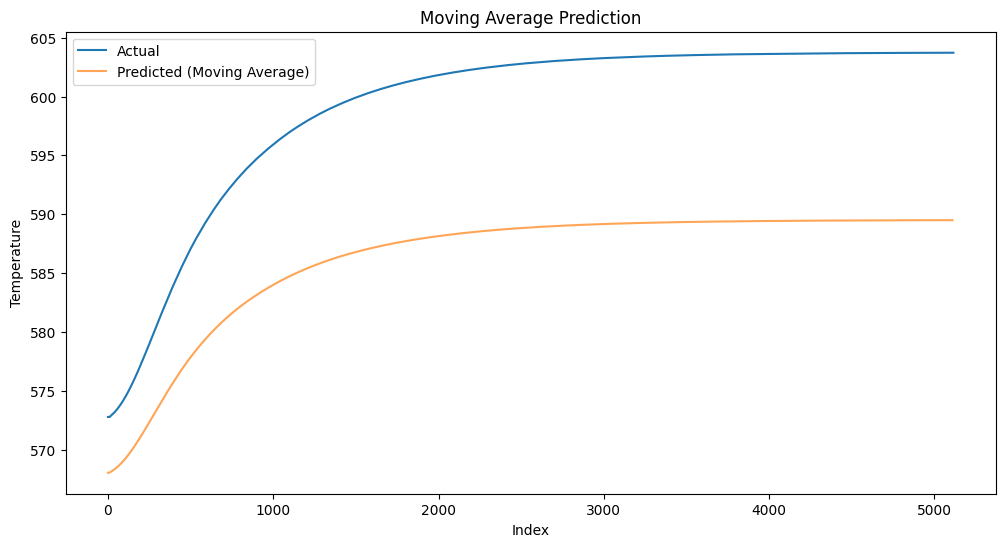

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Load the data
data = pd.read_csv('myPOWER0.3-1_LOOP.csv')

# Selecting the 20 features and the target variable
features = ['vol_170101040.tempf', 'vol_170101050.tempf', 'vol_170102040.tempf', 'vol_170102050.tempf',
            'vol_170102060.tempf', 'vol_170103040.tempf', 'vol_170103050.tempf', 'vol_170103060.tempf',
            'vol_340010000.tempf', 'vol_340020000.tempf', 'vol_340140000.tempf', 'vol_440010000.tempf',
            'vol_440020000.tempf', 'vol_440030000.tempf', 'vol_440140000.tempf', 'vol_440150000.tempf',
            'vol_540010000.tempf', 'vol_540020000.tempf', 'vol_540140000.tempf', 'vol_540150000.tempf']
target = 'vol_170101060.tempf'

# Using Moving Average for Prediction
# Here, we use a simple average of the selected features as a baseline prediction
# 设置窗口大小为5
window_size = 5
data['moving_avg_pred'] = data[features].mean(axis=1).rolling(window=window_size).mean().shift(-window_size)

# 计算 MAE 和 MSE
mae = mean_absolute_error(data[target][window_size:], data['moving_avg_pred'].dropna())
mse = mean_squared_error(data[target][window_size:], data['moving_avg_pred'].dropna())
print(f'MAE: {mae}, MSE: {mse}')

# 可视化
plt.figure(figsize=(12, 6))
plt.plot(data[target], label='Actual')
plt.plot(data['moving_avg_pred'], label='Predicted (Moving Average)', alpha=0.7)
plt.title('Moving Average Prediction')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [ ]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)


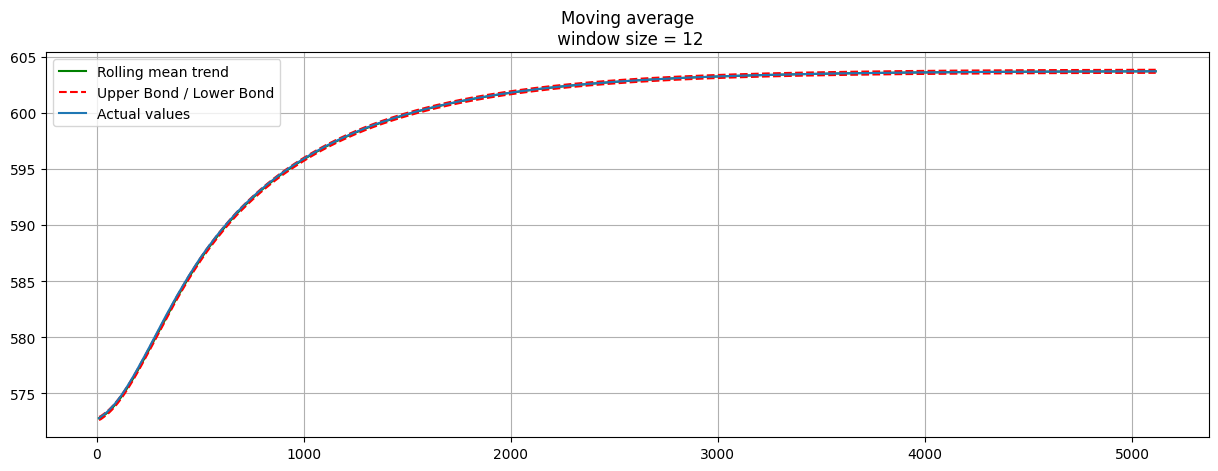

In [ ]:
plotMovingAverage(data[target], 12,plot_intervals=True)

- 差距确实很大，不过趋势是对的

#### 指数平滑法
- 根据时间远近，区分重要程度，加上权重---》区分重要程度很多算法都有。如果能改进这个，所有算法都可以提升。注意力机制其实也是如此。
  - 它给过去的观测值赋予递减的权重，最近的数据点对预测有更大的影响。这种方法适用于没有明显趋势和季节性的数据。

d:\Software\CodeApp\Anaconda\envs\test\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


MAE: 0.03026078162415713, MSE: 0.0031625002406498078


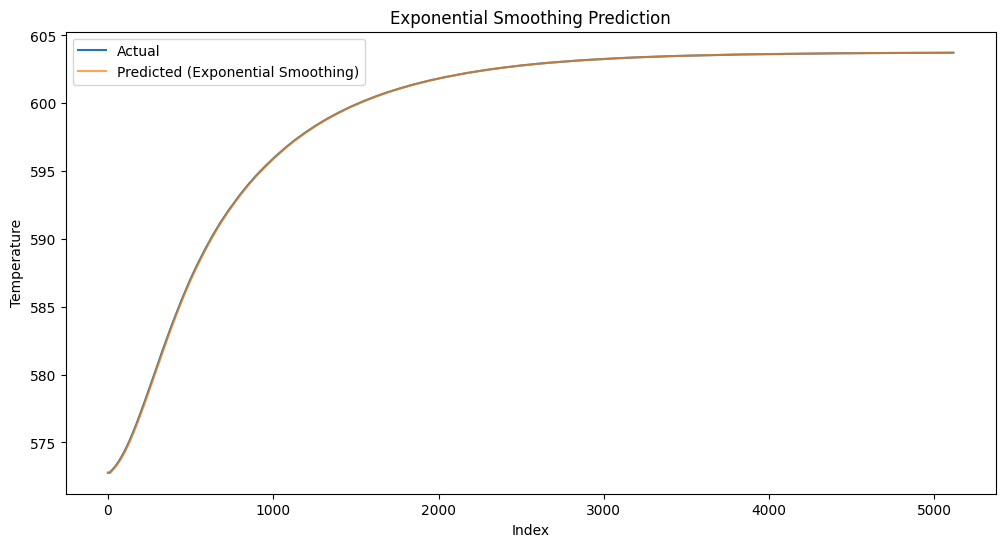

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# 使用指数平滑进行预测
model = SimpleExpSmoothing(data[target])
fit_model = model.fit(smoothing_level=0.2)  # smoothing_level 为平滑参数
data['exp_smooth_pred'] = fit_model.fittedvalues.shift(-1)

# 计算 MAE 和 MSE
mae = mean_absolute_error(data[target][1:], data['exp_smooth_pred'].dropna())
mse = mean_squared_error(data[target][1:], data['exp_smooth_pred'].dropna())
print(f'MAE: {mae}, MSE: {mse}')

# 可视化
plt.figure(figsize=(12, 6))
plt.plot(data[target], label='Actual')
plt.plot(data['exp_smooth_pred'], label='Predicted (Exponential Smoothing)', alpha=0.7)
plt.title('Exponential Smoothing Prediction')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()


- ARIMA
  - ARIMA（自回归积分滑动平均）模型是一种常用的时间序列预测方法。
  - 它结合了自回归（AR）、差分（I）和移动平均（MA）三个部分。
  - ARIMA 可以捕捉数据的不同时间序列特性，适用于具有趋势或季节性的数据。

d:\Software\CodeApp\Anaconda\envs\test\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


MAE: 0.00027299024266934363, MSE: 5.177355363309226e-07


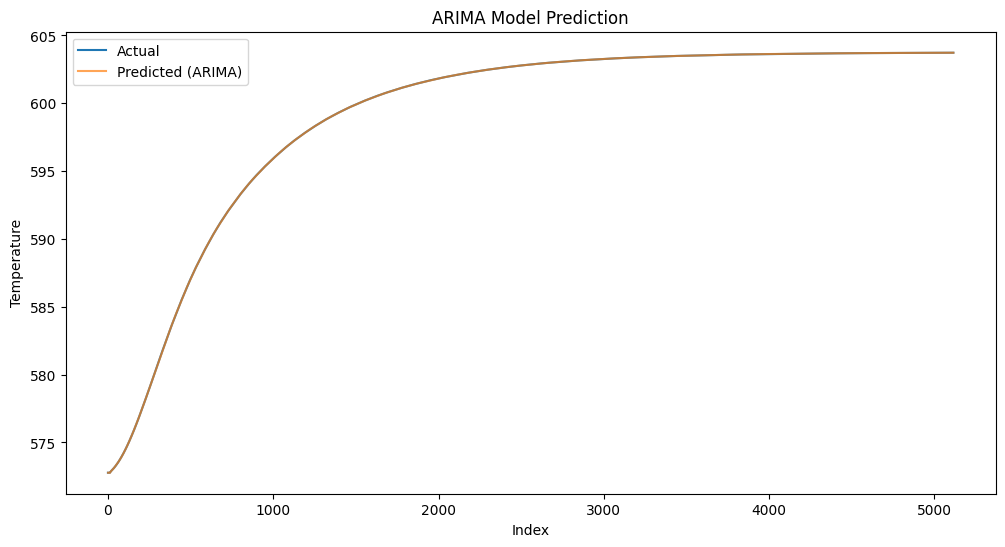

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 使用 ARIMA 进行预测
model = ARIMA(data[target], order=(5,1,0))  # 举例：order (5,1,0) 代表 ARIMA 参数
fit_model = model.fit()
data['arima_pred'] = fit_model.predict(start=1, end=len(data[target]), typ='levels')

# 确保目标变量和预测值对齐
aligned_target = data[target].iloc[1:]
aligned_pred = data['arima_pred'].iloc[1:]

# 计算 MAE 和 MSE
mae = mean_absolute_error(data[target][1:], data['arima_pred'].dropna())
mse = mean_squared_error(data[target][1:], data['arima_pred'].dropna())
print(f'MAE: {mae}, MSE: {mse}')

# 可视化
plt.figure(figsize=(12, 6))
plt.plot(data[target], label='Actual')
plt.plot(data['arima_pred'], label='Predicted (ARIMA)', alpha=0.7)
plt.title('ARIMA Model Prediction')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()


- 指数平均到ARIMA的效果都逐步变的更好

# 长时序预测，前96预测后24

#### 移动平均

MAE: 13.215872940452774, MSE: 177.6987898247018


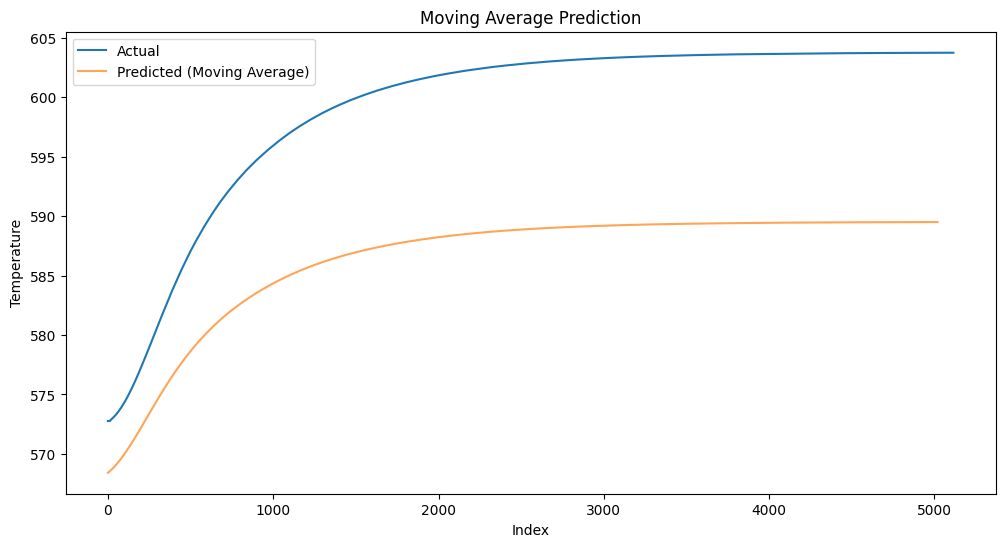

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Load the data
data = pd.read_csv('myPOWER0.3-1_LOOP.csv')

# Selecting the 20 features and the target variable
features = ['vol_170101040.tempf', 'vol_170101050.tempf', 'vol_170102040.tempf', 'vol_170102050.tempf',
            'vol_170102060.tempf', 'vol_170103040.tempf', 'vol_170103050.tempf', 'vol_170103060.tempf',
            'vol_340010000.tempf', 'vol_340020000.tempf', 'vol_340140000.tempf', 'vol_440010000.tempf',
            'vol_440020000.tempf', 'vol_440030000.tempf', 'vol_440140000.tempf', 'vol_440150000.tempf',
            'vol_540010000.tempf', 'vol_540020000.tempf', 'vol_540140000.tempf', 'vol_540150000.tempf']
target = 'vol_170101060.tempf'

# Using Moving Average for Prediction
# Here, we use a simple average of the selected features as a baseline prediction
# 设置窗口大小为5
window_size = 96
data['moving_avg_pred'] = data[features].mean(axis=1).rolling(window=window_size).mean().shift(-window_size)

# 计算 MAE 和 MSE
mae = mean_absolute_error(data[target][window_size:], data['moving_avg_pred'].dropna())
mse = mean_squared_error(data[target][window_size:], data['moving_avg_pred'].dropna())
print(f'MAE: {mae}, MSE: {mse}')

# 可视化
plt.figure(figsize=(12, 6))
plt.plot(data[target], label='Actual')
plt.plot(data['moving_avg_pred'], label='Predicted (Moving Average)', alpha=0.7)
plt.title('Moving Average Prediction')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()


#### 指数平滑

d:\Software\CodeApp\Anaconda\envs\test\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


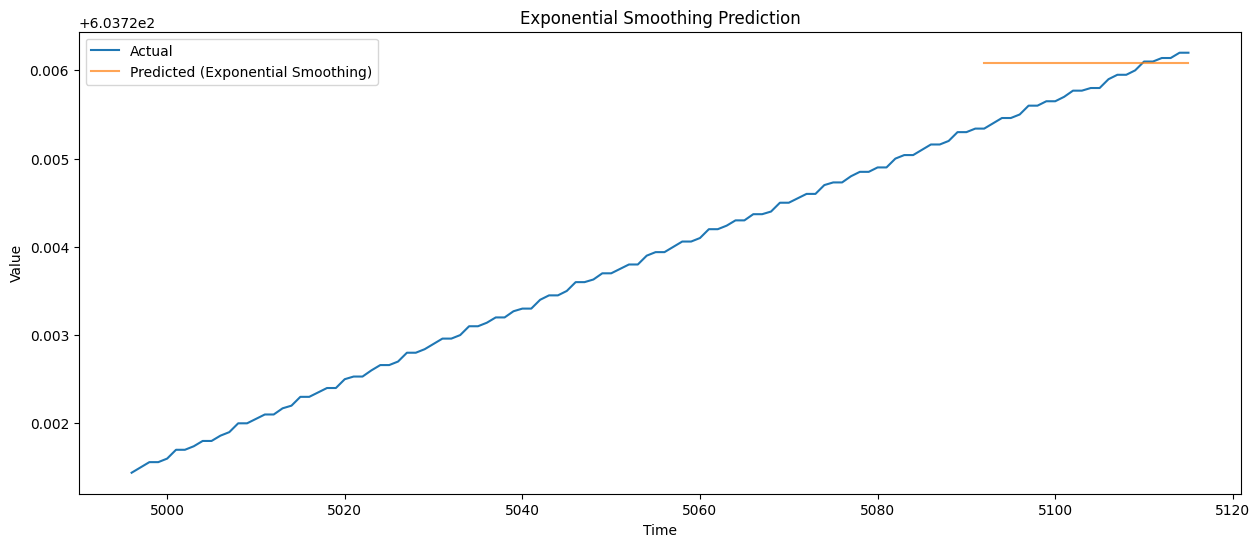

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# 指数平滑预测
model = SimpleExpSmoothing(data[target])
fit_model = model.fit(smoothing_level=0.2)
forecast = fit_model.forecast(24)

# 可视化
plt.figure(figsize=(15, 6))
plt.plot(data[target][-120:], label='Actual')
plt.plot(data.index[-24:], forecast, label='Predicted (Exponential Smoothing)', alpha=0.7)
plt.title('Exponential Smoothing Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


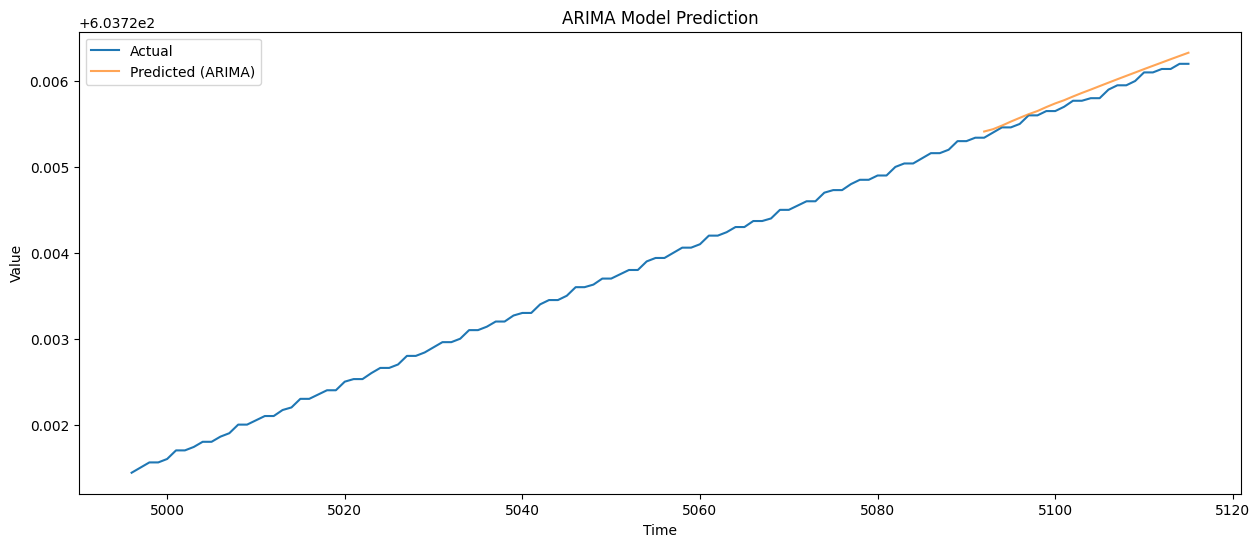

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA预测
model = ARIMA(data[target].iloc[-120:-24], order=(5,1,0))
fit_model = model.fit()
forecast = fit_model.forecast(24)

# 可视化
plt.figure(figsize=(15, 6))
plt.plot(data[target][-120:], label='Actual')
plt.plot(data.index[-24:], forecast, label='Predicted (ARIMA)', alpha=0.7)
plt.title('ARIMA Model Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# 线性回归

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Load the provided CSV file
file_path = 'myPOWER0.3-1_LOOP.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
data.head()


# Specified features and target
features = ['vol_170101040.tempf', 'vol_170101050.tempf', 'vol_170102040.tempf', 'vol_170102050.tempf',
            'vol_170102060.tempf', 'vol_170103040.tempf', 'vol_170103050.tempf', 'vol_170103060.tempf',
            'vol_340010000.tempf', 'vol_340020000.tempf', 'vol_340140000.tempf', 'vol_440010000.tempf',
            'vol_440020000.tempf', 'vol_440030000.tempf', 'vol_440140000.tempf', 'vol_440150000.tempf',
            'vol_540010000.tempf', 'vol_540020000.tempf', 'vol_540140000.tempf', 'vol_540150000.tempf']
target = 'vol_170101060.tempf'

# Selecting the specified features and target from the dataset
X = data[features]
y = data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating the Linear Regression model
model = LinearRegression()

# Training the model with training data
model.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

mse


1.3028887928413915e-06

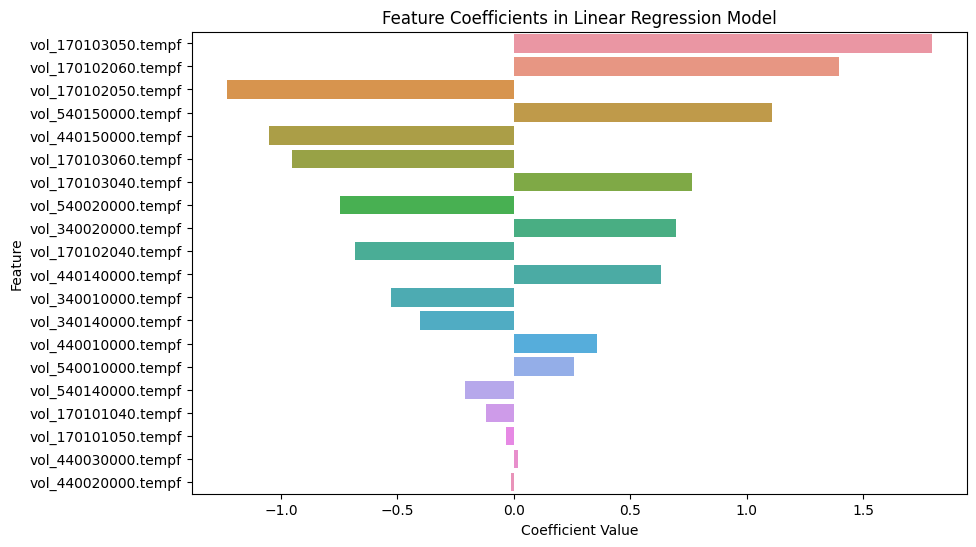

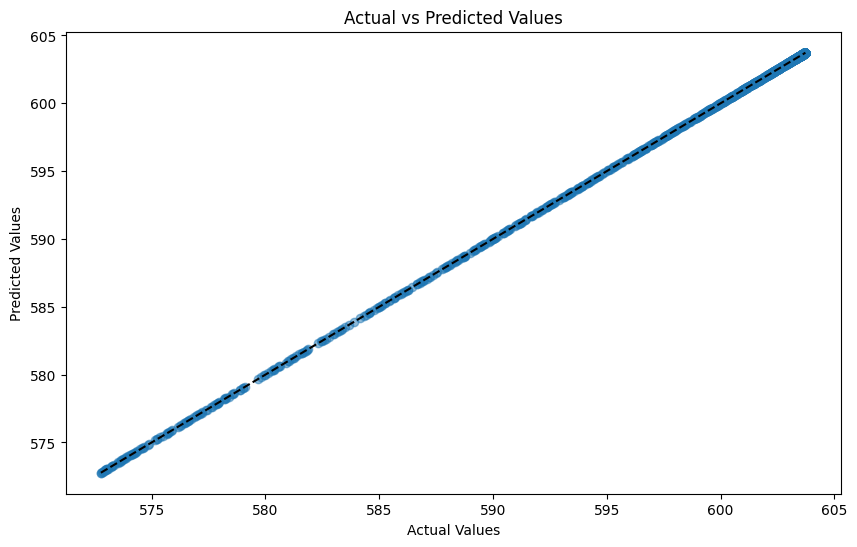

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting feature coefficients from the model
feature_coefficients = model.coef_

# Creating a DataFrame to display feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': feature_coefficients})

# Sorting the DataFrame based on the absolute value of coefficients for better visualization
coefficients_df = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

# Plotting the feature coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df)
plt.title('Feature Coefficients in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--') # Diagonal line
plt.show()


- 特征系数图
  - 查看特征系数图：
    - 如果某个或某些特征的系数远大于其他特征，这可能是过拟合的迹象。过拟合意味着模型可能过度依赖这些特征，从而在面对新的、未见过的数据时表现不佳。
- 查看实际值与预测值对比图：
  - 如果大部分点都非常靠近对角线，这通常意味着模型预测效果好，没有明显的过拟合迹象。然而，如果点的分布很分散，尤其是在某些特定区域，这可能表明模型在某些情况下预测不准确，可能存在过拟合或欠拟合。
- 如果你发现过拟合的迹象，你可能需要考虑使用更简单的模型、减少特征数量或使用正则化技术来改进模型。

# 全部特征线性回归

均方误差 (MSE): 5.906766548878478e-08
y_test: 530     587.84247
5002    603.72170
4885    603.71625
1340    598.95130
4066    603.64030
          ...    
2347    602.55920
3815    603.59410
1106    597.04760
4334    603.67487
818     593.55023
Name: vol_170101060.tempf, Length: 1535, dtype: float64
y_pred: [587.8425445  603.721745   603.71627106 ... 597.04721626 603.67484171
 593.55043798]


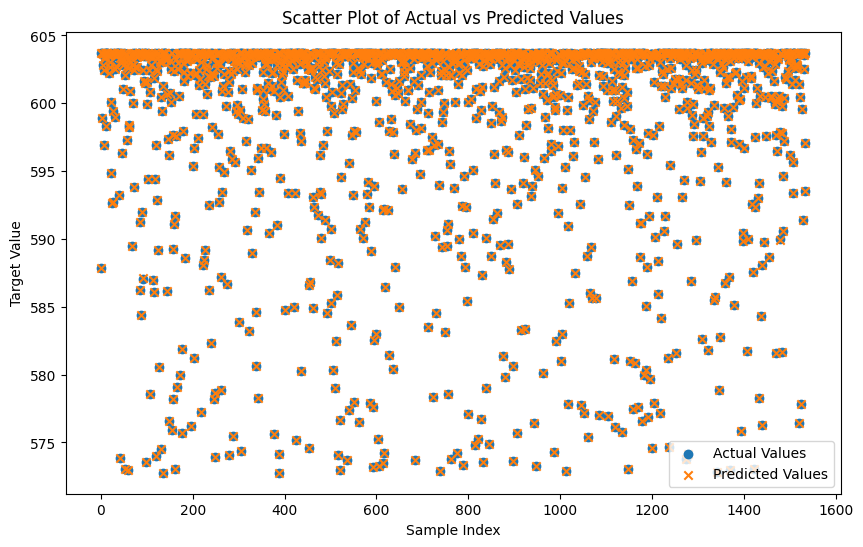

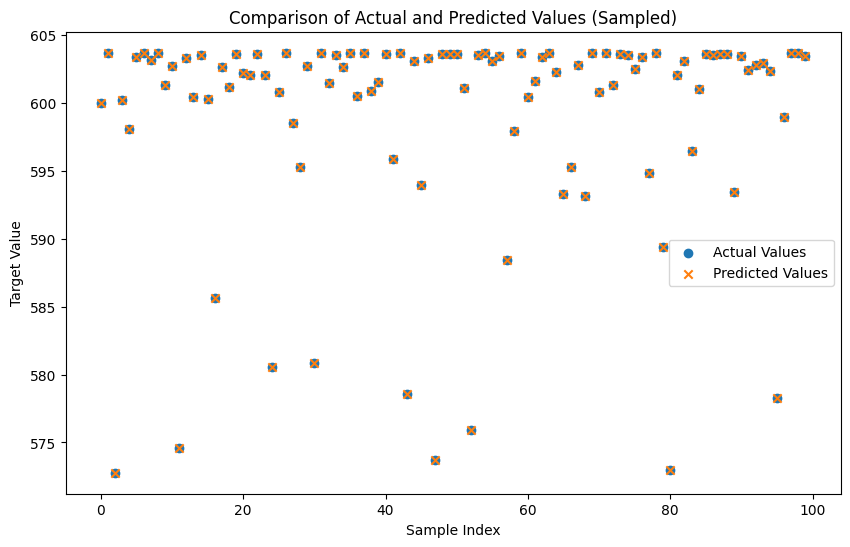

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd


# 加载数据
file_path = 'myPOWER0.3-1_LOOP.csv'
data = pd.read_csv(file_path)

# 选择所有特征（除了目标变量和日期列）
X = data.drop(['date', 'vol_170101060.tempf'], axis=1)  # 假设目标列是 'vol_170101060.tempf'

# 选择目标变量
y = data['vol_170101060.tempf']

# 分割数据
# 从样本中随机的按比例选取，random_state是随机种子，伪随机，所以固定之后每次划分的一样
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估性能
mse = mean_squared_error(y_test, y_pred)
print("均方误差 (MSE):", mse)

print("y_test:",y_test)
print('y_pred:',y_pred)



# 可视化方法 1: 散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o')
plt.scatter(range(len(y_test)), y_pred, label='Predicted Values', marker='x')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()


# 太多了，绘制不好看，随机选100各点画一下
# 随机抽样100个样本进行可视化
import numpy as np
sample_indices = np.random.choice(X_test.index, 100, replace=False)
sample_y_test = y_test.loc[sample_indices]
relative_indices = [np.where(X_test.index == idx)[0][0] for idx in sample_indices]
sample_y_pred = y_pred[relative_indices]

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sample_y_test)), sample_y_test, label='Actual Values', marker='o')
plt.scatter(range(len(sample_y_pred)), sample_y_pred, label='Predicted Values', marker='x')
plt.title('Comparison of Actual and Predicted Values (Sampled)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

# XGBoost

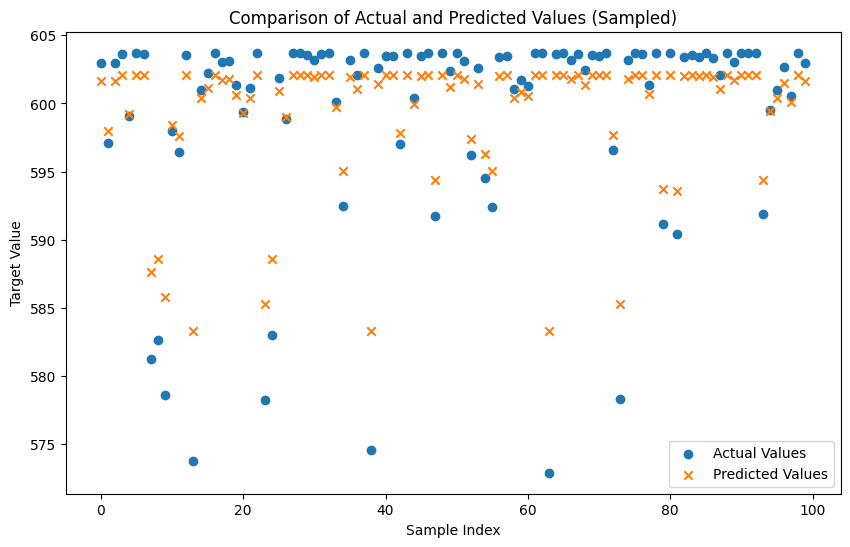

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
file_path = 'myPOWER0.3-1_LOOP.csv'  # 请根据实际路径调整
data = pd.read_csv(file_path)

# 选择特征和目标变量
features = data.drop(['date', 'vol_170101060.tempf'], axis=1)  # 排除日期和目标列
target = data['vol_170101060.tempf']

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# 训练 XGBoost 模型
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                         max_depth = 5, alpha = 10, n_estimators = 10)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 随机抽样100个样本进行可视化
sample_indices = np.random.choice(X_test.index, 100, replace=False)
sample_y_test = y_test.loc[sample_indices]
relative_indices = [np.where(X_test.index == idx)[0][0] for idx in sample_indices]
sample_y_pred = y_pred[relative_indices]

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sample_y_test)), sample_y_test, label='Actual Values', marker='o')
plt.scatter(range(len(sample_y_pred)), sample_y_pred, label='Predicted Values', marker='x')
plt.title('Comparison of Actual and Predicted Values (Sampled)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()


- 上图显示效果没有线性回归好，他的mse也很大，所以mse是可以衡量的

# LSTM（GRU

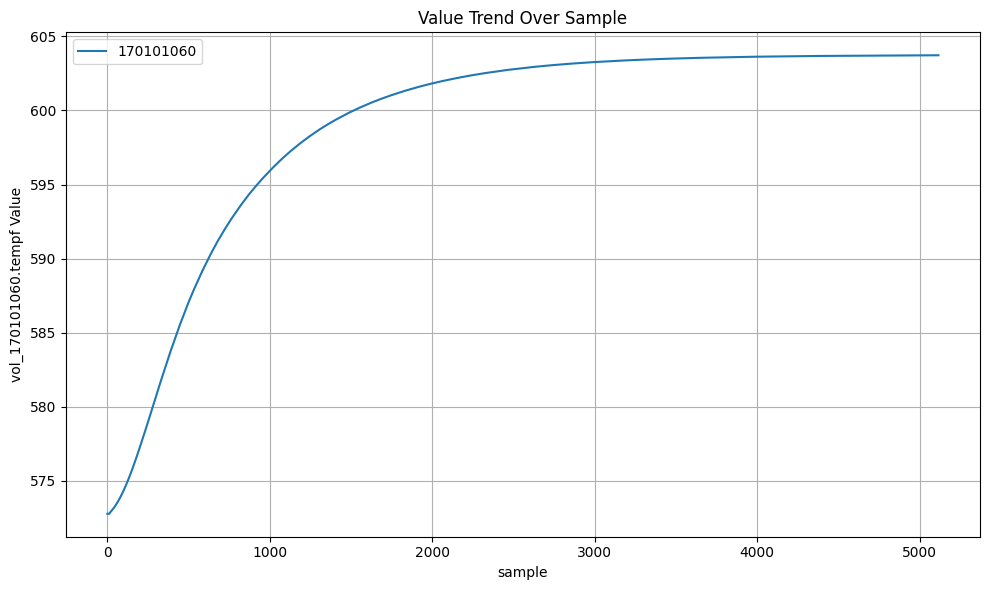

In [158]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# 加载数据
file_path = 'myPOWER0.3-1_LOOP.csv'
data = pd.read_csv(file_path)

data = data.set_index(['date'],drop=True)


x = range(len(data))
plt.figure(figsize=(10, 6))
plt.plot(x, data['vol_170101060.tempf'], label='170101060')
plt.xlabel('sample')
plt.ylabel('vol_170101060.tempf Value')
plt.title('Value Trend Over Sample')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

- https://cloud.tencent.com/developer/article/2131414

- 去掉稳态的

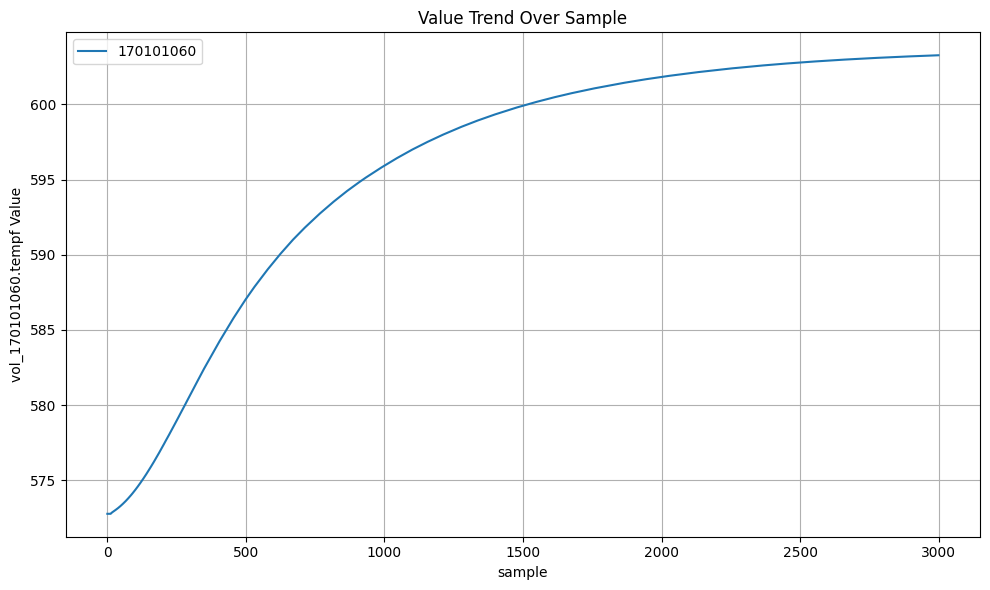

In [159]:
data = data.iloc[:3000]
data.shape

x = range(len(data))
plt.figure(figsize=(10, 6))
plt.plot(x, data['vol_170101060.tempf'], label='170101060')
plt.xlabel('sample')
plt.ylabel('vol_170101060.tempf Value')
plt.title('Value Trend Over Sample')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [133]:
# 获取列名列表
column_names = data.columns.tolist()

# 找到特定列名的索引
print(column_names)
column_index = column_names.index('vol_170101060.tempf')
column_index
# output_target = ['vol_170101060.tempf']
# len(output_target)
data_array = data.values
column_values= data_array[0:2, column_index]
column_values

['vol_170101010.tempf', 'vol_170101020.tempf', 'vol_170101030.tempf', 'vol_170101040.tempf', 'vol_170101050.tempf', 'vol_170101060.tempf', 'vol_170102010.tempf', 'vol_170102020.tempf', 'vol_170102030.tempf', 'vol_170102040.tempf', 'vol_170102050.tempf', 'vol_170102060.tempf', 'vol_170103010.tempf', 'vol_170103020.tempf', 'vol_170103030.tempf', 'vol_170103040.tempf', 'vol_170103050.tempf', 'vol_170103060.tempf', 'vol_170101010.p', 'vol_170101020.p', 'vol_170101030.p', 'vol_170101040.p', 'vol_170101050.p', 'vol_170101060.p', 'vol_170102010.p', 'vol_170102020.p', 'vol_170102030.p', 'vol_170102040.p', 'vol_170102050.p', 'vol_170102060.p', 'vol_170103010.p', 'vol_170103020.p', 'vol_170103030.p', 'vol_170103040.p', 'vol_170103050.p', 'vol_170103060.p', 'junc_170101014.mflowj', 'junc_170101016.mflowj', 'junc_170101024.mflowj', 'junc_170101026.mflowj', 'junc_170101034.mflowj', 'junc_170101036.mflowj', 'junc_170101044.mflowj', 'junc_170101046.mflowj', 'junc_170101054.mflowj', 'junc_170101056.mf

array([572.7693, 572.7693])

- 差分

In [25]:
def difference(data_set,interval=1):
    diff = list()
    for i in range(interval , len(data_set)):
        value = data_set[i] - data_set[i-interval]
        diff.append(value)
    return np.array(diff)
raw_value = data.values
diff_value = difference(raw_value,1)
diff_value

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.999...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
2994    [0.00018000000000029104, 0.0003100000000131331...
2995    [0.00027000000000043656, 0.0003499999999121428...
2996    [0.00016000000005078618, 0.0003000000000383807...
2997    [0.00018000000000029104, 0.0004000000000132786...
2998    [0.0002599999999119973, 0.00029999999992469384...
Length: 2999, dtype: object

- https://blog.51cto.com/u_15834745/6023308

- 制作数据集
  - 把csv里一行行数据，变成模型的输入和输出
    - 输入 ： n个样本（时间步）组成的历史窗口
      - 要用多特征，就是每个样本再用一个向量表示
    - 输出 ： m个你希望预测的样本

- 制作测试集直接取的最后0.2，没有随机采样

In [154]:
# 这里希望用滑动窗口，每个每次滑动一个样本，按照输入和预测窗口大小作为输入和输出
def split_data(data,input_timestep,output_timestep,input_feature_size,output_target_size,output_target):
    dataX = [] # 保存X
    dataY = [] # 保存Y
    # 将整个窗口的数据,逐次滑动，保存到X中，将未来n天保存到Y中
    # 循环次数为多少份样本
    for index in range(len(data) - input_timestep - output_timestep):
        index1 = index
        index2 = index+input_timestep
        index3 = index+input_timestep+output_timestep
        dataX.append(data[index1:index2]) # 左闭右开，取不到index2
        dataY.append(data[index2:index3,output_target])
    
    dataX = np.array(dataX)
    dataY = np.array(dataY)
    print(dataX.shape)

    # 获取训练集大小
    train_size = int(np.round(0.8 * dataX.shape[0]))

    x_train = dataX[:train_size,:].reshape(-1 , input_timestep , input_feature_size)
    y_train = dataY[:train_size,:].reshape(-1 , output_timestep, output_target_size)
    print(x_train.shape)
    print(y_train.shape)

    x_test = dataX[train_size: , :].reshape(-1, input_timestep, input_feature_size)
    y_test = dataY[train_size: , :].reshape(-1 , output_timestep, output_target_size)
    print(x_test.shape)
    print(y_test.shape)

    return (x_train , y_train , x_test , y_test)

# print(data.values.shape)
# ot = ['vol_170101060.tempf','vol_170101050.tempf']
# print(data[0:2][ot])
# # print(np.array(data[0:2]))






- 差分

In [160]:
# 差分之前的数据
data[0:20]

,vol_170101010.tempf,vol_170101020.tempf,vol_170101030.tempf,vol_170101040.tempf,vol_170101050.tempf,vol_170101060.tempf,vol_170102010.tempf,vol_170102020.tempf,vol_170102030.tempf,vol_170102040.tempf,...,vol_800020000.tempg,vol_800030000.tempg,vol_800040000.tempg,vol_800050000.tempg,vol_800060000.tempg,vol_800070000.tempg,vol_800080000.tempg,vol_800090000.tempg,vol_800100000.tempg,vol_800110000.tempg
date,,,,,,,,,,,,,,,,,,,,,
00:00.0,561.74510,564.42500,567.34060,569.98250,572.05023,572.76930,561.84180,564.60520,567.60730,570.33820,...,557.21820,557.13230,557.05110,556.97340,556.89700,556.82214,556.74820,556.66754,556.60900,556.55414
00:00.6,561.74510,564.42500,567.34060,569.98250,572.05023,572.76930,561.84180,564.60520,567.60730,570.33820,...,557.21814,557.13226,557.05110,556.97340,556.89700,556.82214,556.74820,556.66754,556.60900,556.55420
00:01.6,561.74510,564.42500,567.34060,569.98250,572.05023,572.76930,561.84180,564.60520,567.60730,570.33820,...,557.21820,557.13230,557.05110,556.97340,556.89703,556.82214,556.74820,556.66754,556.60900,556.55414
00:02.6,561.74510,564.42500,567.34060,569.98250,572.05023,572.76930,561.84180,564.60520,567.60730,570.33820,...,557.21820,557.13230,557.05115,556.97345,556.89703,556.82220,556.74820,556.66760,556.60910,556.55414
00:03.7,561.74510,564.42500,567.34060,569.98250,572.05023,572.76930,561.84180,564.60520,567.60736,570.33820,...,557.21826,557.13240,557.05120,556.97345,556.89710,556.82220,556.74820,556.66754,556.60890,556.55390
00:04.7,561.74510,564.42500,567.34060,569.98250,572.05023,572.76930,561.84180,564.60520,567.60736,570.33820,...,557.21826,557.13240,557.05115,556.97345,556.89710,556.82220,556.74830,556.66766,556.60920,556.55430
00:05.7,561.74510,564.42500,567.34060,569.98250,572.05023,572.76930,561.84180,564.60520,567.60730,570.33820,...,557.21820,557.13230,557.05110,556.97340,556.89703,556.82220,556.74820,556.66760,556.60910,556.55426
00:06.7,561.74510,564.42500,567.34060,569.98250,572.05023,572.76930,561.84180,564.60520,567.60730,570.33820,...,557.21820,557.13230,557.05115,556.97340,556.89703,556.82220,556.74830,556.66760,556.60910,556.55420
00:07.9,561.74510,564.42500,567.34060,569.98250,572.05023,572.76930,561.84180,564.60520,567.60730,570.33820,...,557.21820,557.13230,557.05110,556.97340,556.89700,556.82214,556.74820,556.66754,556.60910,556.55420


In [161]:
# 差分

def difference(data_set,interval=1):
    diff = list()
    for i in range(interval , len(data_set)):
        value = data_set[i] - data_set[i-interval]
        diff.append(value)
    return np.array(diff)

output_target = ['vol_170101060.tempf']

# key转换为 数字索引
# 因为要归一化或者差分，都是用np数组来的，就不能用key来索引了

# 获取列名列表
column_names = data.columns.tolist()

output_target_index = []
for i in range(len(output_target)):
    index =  column_names.index(output_target[i])
    output_target_index.append(index)
output_target_size = len(output_target) 

print(output_target_index)

data = data.values
print(data[1][5])
data = difference(data)
data[0:20]



[5]
572.7693


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  6.00000001e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -6.00000001e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.00000000e-05,  1.00000000e-04,  0.00000000e+00],
       ...,
       [ 1.89000000e-03,  4.85000000e-03,  7.90000000e-03, ...,
         1.60000000e-04,  1.30000000e-04,  1.60000000e-04],
       [ 1.67000000e-03,  4.45000000e-03,  7.30000000e-03, ...,
         0.00000000e+00,  6.99999999e-05,  1.40000000e-04],
       [ 1.60000000e-03,  4.30000000e-03,  7.00000000e-03, ...,
        -4.00000000e-05,  0.00000000e+00,  1.00000000e-04]])

In [162]:
output_target_index[0]
data[0:20,5]

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.01427, 0.02353,
       0.01925, 0.0163 , 0.0166 , 0.01375, 0.0128 , 0.0122 ])

- 归一化
  - 常见归一化Min-max、z-score、L2范数归一化
  - 这里先用min-max , 将所有数据缩放到**0-1**之间
  - 手动实现代码即 `(df - df.min()) / (df.max() - df.min())`，也可以用sklearn的`MinMaxScaler()`
- 为什么要归一化？
  - https://www.jianshu.com/p/95a8f035c86c
  - 归一化 （Normalization）、标准化 （Standardization）和中心化/零均值化 （Zero-centered）

In [163]:
# 归一化之前
data[0:20]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  6.00000001e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -6.00000001e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.00000000e-05,  1.00000000e-04,  0.00000000e+00],
       ...,
       [ 1.89000000e-03,  4.85000000e-03,  7.90000000e-03, ...,
         1.60000000e-04,  1.30000000e-04,  1.60000000e-04],
       [ 1.67000000e-03,  4.45000000e-03,  7.30000000e-03, ...,
         0.00000000e+00,  6.99999999e-05,  1.40000000e-04],
       [ 1.60000000e-03,  4.30000000e-03,  7.00000000e-03, ...,
        -4.00000000e-05,  0.00000000e+00,  1.00000000e-04]])

- 下面结果可以看到归一化之后，我们的数据差异是变大了

In [164]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data[0:20]

array([[0.        , 0.        , 0.00395726, ..., 0.54285714, 0.47404063,
        0.49204406],
       [0.        , 0.        , 0.00395726, ..., 0.54285714, 0.47404063,
        0.47735618],
       [0.        , 0.        , 0.00395726, ..., 0.56      , 0.496614  ,
        0.48470012],
       ...,
       [0.18824701, 0.28362573, 0.31658093, ..., 0.58857143, 0.503386  ,
        0.50428397],
       [0.16633466, 0.26023392, 0.29283736, ..., 0.54285714, 0.48984199,
        0.50183599],
       [0.15936255, 0.25146199, 0.28096557, ..., 0.53142857, 0.47404063,
        0.49694002]])

- 获取训练数据

In [165]:
x_train , y_train , x_test , y_test =split_data(data,100,10,375,output_target_size,output_target_index[0])
x_train[0:5],y_train[0:5]

(2889, 100, 375)
(2311, 100, 375)
(2311, 10, 1)
(578, 100, 375)
(578, 10, 1)


(array([[[0.        , 0.        , 0.00395726, ..., 0.54285714,
          0.47404063, 0.49204406],
         [0.        , 0.        , 0.00395726, ..., 0.54285714,
          0.47404063, 0.47735618],
         [0.        , 0.        , 0.00395726, ..., 0.56      ,
          0.496614  , 0.48470012],
         ...,
         [0.56772908, 0.59239766, 0.58171745, ..., 0.55714286,
          0.47404063, 0.46756426],
         [0.57768924, 0.5994152 , 0.58725762, ..., 0.51428571,
          0.45146727, 0.47001224],
         [0.65737052, 0.6754386 , 0.66323704, ..., 0.52285714,
          0.47404063, 0.48470012]],
 
        [[0.        , 0.        , 0.00395726, ..., 0.54285714,
          0.47404063, 0.47735618],
         [0.        , 0.        , 0.00395726, ..., 0.56      ,
          0.496614  , 0.48470012],
         [0.        , 0.        , 0.00395726, ..., 0.52571429,
          0.42889391, 0.45532436],
         ...,
         [0.57768924, 0.5994152 , 0.58725762, ..., 0.51428571,
          0.45146727, 0.

- 将数据转为tensor，因为pytorch需要tensor类型数据
  

In [167]:
# x_train , y_train , x_test , y_test
x_train_tensor = torch.from_numpy(x_train).to(torch.float32)
y_train_tensor = torch.from_numpy(y_train).to(torch.float32)
x_test_tensor = torch.from_numpy(x_test).to(torch.float32)
y_test_tensor = torch.from_numpy(y_test).to(torch.float32)

- 形成训练和测试数据集（小型数据集时，可以直接用）

In [168]:
from torch.utils.data import TensorDataset,DataLoader
train_data = TensorDataset(x_train_tensor,y_train_tensor)

test_data = TensorDataset(x_test_tensor,y_test_tensor)


- 用迭代器DataLoader
  - 当数据过大时，防止内存爆炸，不能一下子全读入内存，要用迭代器，分批次一点点加载数据

In [169]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size,
                                           False) # 不shuffle
test_loader = DataLoader(test_data , batch_size,False)

## 搭建GRU模型

- 预测后10步
  1. 一次一直输出10个
  2. 滑动输出，一次输出一个，然后窗口滑动，输出下一个

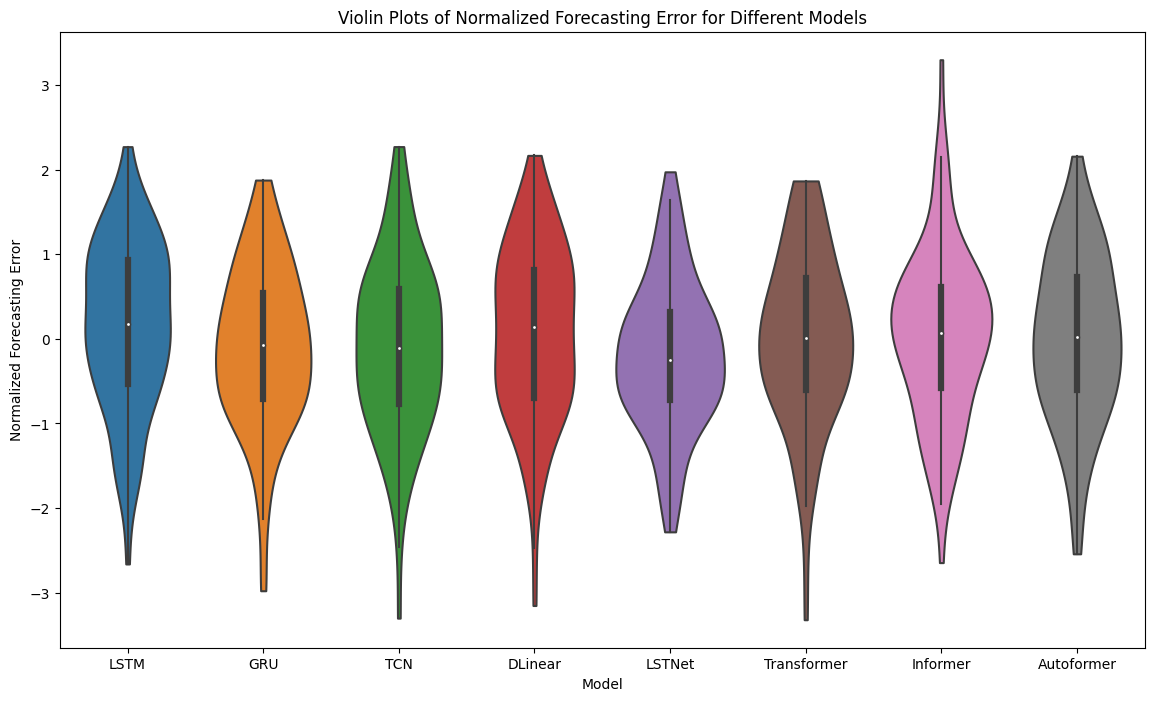

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 模拟数据生成
# 假设我们有8个模型的归一化预测误差数据
models = ['LSTM', 'GRU', 'TCN', 'DLinear', 'LSTNet', 'Transformer', 'Informer', 'Autoformer']
data = {}

# 为每个模型生成100个数据点
for model in models:
    data[model] = np.random.normal(loc=0, scale=1, size=100)  # 假设平均值为0，标准差为1

# 将数据转换为DataFrame格式
df = pd.DataFrame(data)

# 将DataFrame转换为'melted'格式，这种格式适合seaborn处理
df_melted = df.melt(var_name='Model', value_name='Normalized Forecasting Error')

# 绘制违背小提琴图
plt.figure(figsize=(14, 8))  # 设置画布大小
sns.violinplot(x='Model', y='Normalized Forecasting Error', data=df_melted, cut=0)

# 添加标题和轴标签
plt.title('Violin Plots of Normalized Forecasting Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Normalized Forecasting Error')

# 显示图表
plt.show()


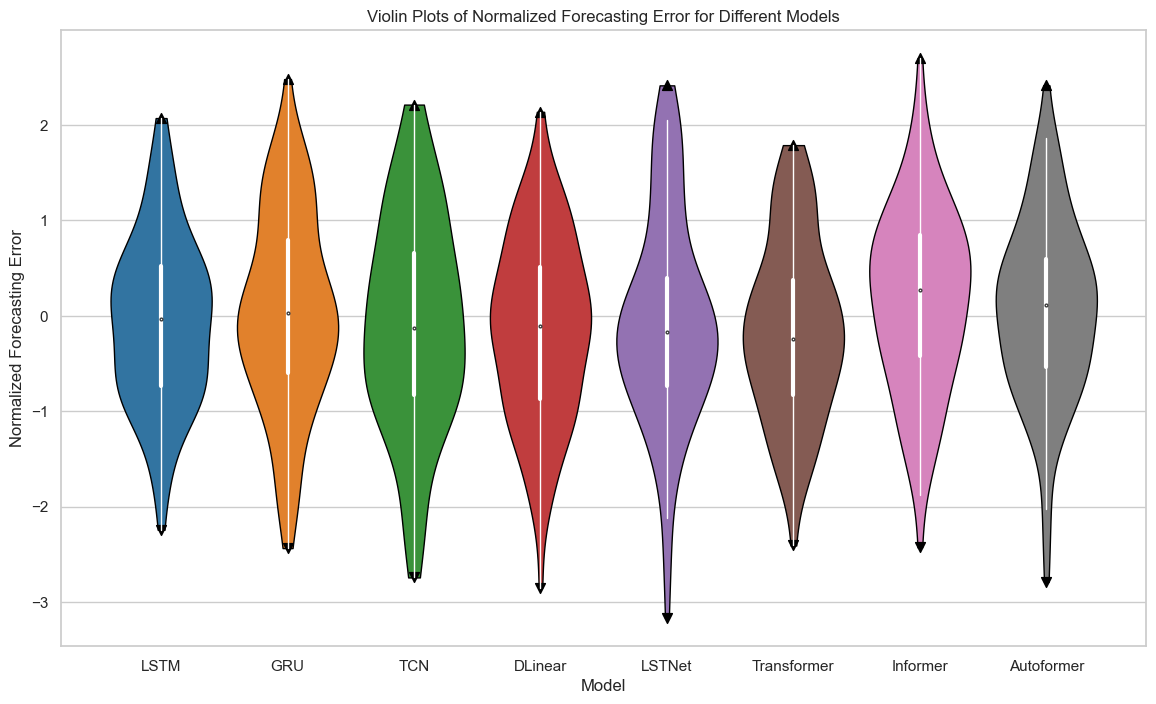

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 设置Seaborn的样式
sns.set(style="whitegrid")

# 模拟数据生成
# 假设我们有8个模型的归一化预测误差数据
models = ['LSTM', 'GRU', 'TCN', 'DLinear', 'LSTNet', 'Transformer', 'Informer', 'Autoformer']
data = {}

# 为每个模型生成100个数据点
for model in models:
    data[model] = np.random.normal(loc=0, scale=1, size=100)  # 假设平均值为0，标准差为1

# 将数据转换为DataFrame格式
df = pd.DataFrame(data)

# 将DataFrame转换为'melted'格式，这种格式适合seaborn处理
df_melted = df.melt(var_name='Model', value_name='Normalized Forecasting Error')

# 自定义颜色
palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]

# 绘制违背小提琴图
plt.figure(figsize=(14, 8))  # 设置画布大小
ax = sns.violinplot(x='Model', y='Normalized Forecasting Error', data=df_melted, palette=palette, cut=0, scale='width', linewidth=1)

# 添加最大值和最小值的标记
for i in range(len(models)):
    plt.scatter([i], [df[models[i]].max()], color='black', marker='^', s=50) # 最大值
    plt.scatter([i], [df[models[i]].min()], color='black', marker='v', s=50) # 最小值

# 设置中位数为白点
for violin in ax.collections[::2]:  # ax.collections包含了所有的小提琴图形
    violin.set_edgecolor('black')
    violin.set_linewidth(1)
for line in ax.lines:  # ax.lines包含了中位数线等其他线条
    line.set_color('white')
    line.set_mfc('white')
    line.set_mec('black')

# 设置标题和轴标签
plt.title('Violin Plots of Normalized Forecasting Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Normalized Forecasting Error')

# 显示图表
plt.show()


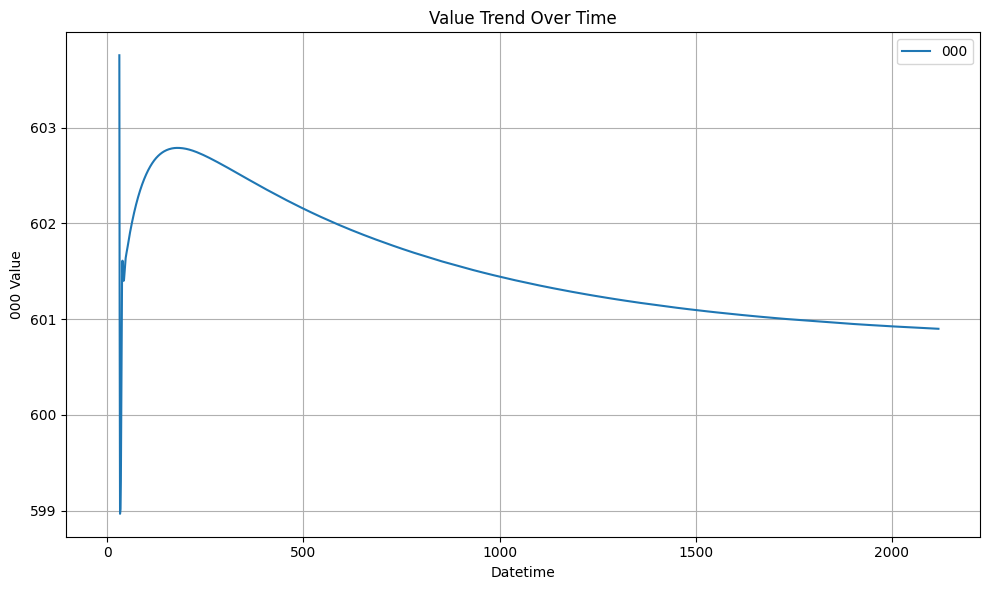

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 泵的性能衰退，导致转速流量下降，热无法导出，后续温度反馈功率又会恢复到稳态，，特征独一无二，人有时候无法判断而已
# 系统级别几个大类故障的分类，六七个
# 故障诊断做支持信息/容错控制
# 状态预测+操作员判断的支持信息（简单的分类），进一步考虑怎么样做的有意思一点，不让别人觉得只是在做分类，仅分类做的人太多，找找不同角度说不同创新点

data = pd.read_csv('pmp_loop1.csv')
plt.figure(figsize=(10, 6))
plt.plot(data['TrendTime'], data['vol_170101060.tempf'], label='000')
plt.xlabel('Datetime')
plt.ylabel('000 Value')
plt.title('Value Trend Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

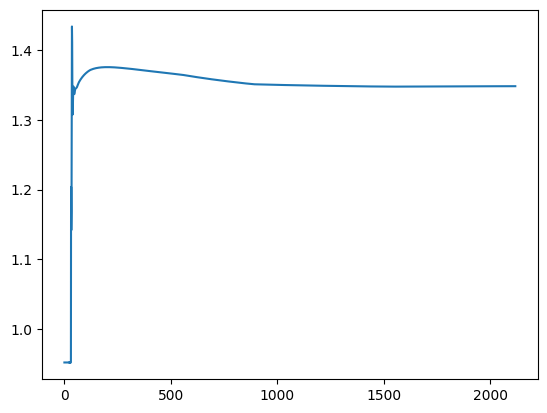

In [3]:
plt.plot(data['TrendTime'], data['junc_170101024.mflowj'], label='000')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

df = pd.read_csv('pmp_loop1.csv')
# Selecting 5 random temperature columns
temp_columns = [col for col in df.columns if 'tempf' in col]
selected_temp_columns = np.random.choice(temp_columns, 5, replace=False)

# Assuming the next 5 columns after temperature columns are flow related
# Adjust this selection based on the actual flow columns in your dataset
flow_columns_start = df.columns.get_loc(selected_temp_columns[-1]) + 1
selected_flow_columns = df.columns[flow_columns_start:flow_columns_start+5]

# Plotting the trends
plt.figure(figsize=(15, 10))

# Plotting temperature trends
for col in selected_temp_columns:
    plt.plot(df['TrendTime'], df[col], label=col)

# Plotting flow trends
for col in selected_flow_columns:
    plt.plot(df['TrendTime'], df[col], label=col, linestyle='--')

plt.xlabel('Trend Time')
plt.ylabel('Values')
plt.title('Temperature and Flow Trends over Time')
plt.legend()
plt.show()
